# FIT5196 Assessment 2: Data Cleansing (%70)
#### Student Name:  Shih Ting Chu
#### Student ID:  29286875

Date: Sep. 30

Environment: Python 3.6.3 and Jupyter notebook
Libraries used: 
* pandas
* numpy
* datetime
* timedelta
* matplotlib
* math
* sklearn

### Introduction
>The dataset is about delivering packages using drones in Victoria, Australia. <br>
The description of each data column (16 columns) is shown as below: <br>
- **Id**: A unique id for the delivery
- **Drone type**: A categorical attribute for the type of the drone. We know that each type of drone has three phases of flight  ( namely  takeOff,  onRoute , and  Landing)  . The drone may have different speeds at different phases.  takeOff  and  Landing  phases only take five minutes
- **Post type**: A categorical attribute for the type of delivery (0:normal, 1:express)
- **Package weight**: The weight of the package
- **Origin region**: A categorical attribute representing the region for the origin of the delivery
- **Destination region**: A categorical attribute representing the region for the destination of the delivery
- **Origin latitude**: Latitude of the origin
- **Origin longitude**: Longitude of the origin
- **Destination latitude**: Latitude of the destination
- **Destination longitude**: Longitude of the destination
- **Distance**: Distance of the journey
- **Departure date**: Date of the departure
- **Departure time**: Time of the departure. We know that the delivery company has a specific rule to define morning (6:00:00 - 11:59:59), afternoon (12:00:00 - 20:59:59), and night (21:00 - 5:59:59)
- **Travel time**: Travel time (i.e., duration) of the journey
- **Delivery time**: The time of the delivery
- **Delivery price**: Delivery fare. We know that the fare has a linear relation with some of the attributes of the dataset

**Note 1**: the output csv file must have <span style="color:blue">the exact same columns</span> as the input. <br>
**Note 2**: the radius of the earth is <span style="color:blue">6378</span> km. <br>
**Note 3**: as EDA is part of this assessment, no further information will be given publicly regarding the data. However, you can brainstorm with the teaching team during tutorials and consultation sessions. <br>
**Note 4**: there is <span style="color:blue">at least one error</span> in the dataset from each category of the data anomalies (i.e., syntactic, semantic, and coverage).

### Import Libraries and Read CSV file

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
from math import radians, sin, cos, acos
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# read csv file
df = pd.read_csv("29286875.csv")
# df

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

#### Change the name of coulmns to make it easier to use in the following sections

In [2]:
# change the column names (remove the space with the underline)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
# display the first 3 rows
df.head(n=3)

id  drone_type  post_type  package_weight  origin_region  \
0  ID5174772222         2.0        1.0          43.632           47.0   
1  ID1302741470         2.0        0.0          14.230           42.0   
2  ID1271333154         1.0        0.0          31.700           19.0   

   destination_region  origin_latitude  origin_longitude  \
0                 3.0       -37.355446        145.140356   
1                45.0       -38.029425        146.072856   
2                 8.0       -38.467031        144.056414   

   destination_latitude  destination_longitude  journey_distance  \
0            -36.683571             147.271147           203.610   
1            -38.880642             145.089798           127.756   
2            -37.882256             147.344381           294.983   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
0     2018-03-24       03:47:54       163.99       6:31:53         187.16  
1     2018-04-01       19:00:04       105.65      20:45:43         132.04  
2     2018-04-27       01:05:05       240.38       5:05:27         122.90

### Check the sum of NaN values for each column in the data frame

In [3]:
df.isnull().sum()

id                       25
drone_type               10
post_type                20
package_weight            0
origin_region            10
destination_region       10
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time              40
delivery_time             0
delivery_fare            30
dtype: int64

## Steps
>1. Duplicate rows (Semantic Anomalies)
2. Id (Coverage Anomalies & Semantic Anomalies)
3. Departure date (Syntactical Anomalies)
4. Origin Longitude (Syntactical Anomalies)
5. Origin Latitude (Syntactical Anomalies)
6. Destination Longitude (Syntactical Anomalies)
7. Destination Latitude (Syntactical Anomalies)
8. Origin Region (Coverage Anomalies)
9. Destination Region (Coverage Anomalies)
10. Distance (Semantic Anomalies)
11. Travel Time (Syntactical & Semantic Anomalies)
12. Drone Type (Coverage Anomalies)
13. Post Type (Coverage Anomalies)
14. Package Weight (check)
15. Delivery Fare (Outliers)

## 1. Duplicate rows (Semantic Anomalies)
>After excluding the id column, I find there are 60 duplicate rows; if I keep the id column, there are 35 duplicate rows. Also, there are 25 rows with NaN values in the id column. With these findings, we can know that 60 duplicate rows (without id column) include 35 duplicate rows (with id column) and 25 duplicate rows (NaN in id column). Therefore, I am going to remove those 35 duplicate rows first.

In [4]:
# True equal 1 so can use sum to check how many True in this series
copy_no_id_df = df.drop(['id'], axis=1)
sum(copy_no_id_df.duplicated())

60

In [5]:
# 35 duplicate rows (id columns exist)
sum(df.duplicated()) # there are 35 duplicate rows
# df.duplicated()

35

In [6]:
# check 60 - 35 = 25 (which is the total number of NaN)
sum(copy_no_id_df.duplicated()) - sum(df.duplicated())

25

In [7]:
# check those duplicate rows
df[df.duplicated()]

id  drone_type  post_type  package_weight  origin_region  \
39053  ID1520168285         2.0        0.0           7.338           18.0   
39054  ID5426419557         1.0        1.0          29.803           26.0   
39057  ID1600505366         1.0        0.0          16.102            8.0   
39058  ID1708410309         1.0        0.0          43.974           39.0   
39059  ID1990023148         1.0        0.0          21.358           31.0   
39060  ID1776775359         1.0        0.0           7.993           25.0   
39061  ID5822327012         3.0        1.0          36.857           48.0   
39062  ID5416756016         1.0        1.0          41.347            5.0   
39065  ID1631131284         3.0        0.0          41.891            2.0   
39066  ID5159982850         1.0        1.0          31.234           14.0   
39070  ID1452910992         1.0        0.0          54.333            6.0   
39071  ID1963012918         1.0        0.0          39.819           51.0   
39072  ID5168871748         2.0        1.0          26.088            1.0   
39073  ID1370110214         2.0        0.0          20.749           31.0   
39074  ID1187529765         1.0        0.0          12.296           15.0   
39076  ID5790628289         1.0        1.0          11.085           50.0   
39077  ID5184006694         3.0        1.0          42.180            9.0   
39079  ID5184791698         3.0        1.0          30.036           31.0   
39080  ID5883567912         1.0        1.0          39.772           25.0   
39081  ID5901027624         1.0        1.0          36.569           25.0   
39085  ID1808405020         2.0        0.0          14.292           48.0   
39086  ID1981588347         3.0        0.0          42.354           49.0   
39087  ID1852942304         1.0        0.0          14.525            1.0   
39092  ID1441436990         1.0        0.0          30.637           48.0   
39095  ID5190254409         1.0        1.0          14.354           33.0   
39097  ID1983083322         3.0        0.0          43.591            4.0   
39098  ID1314059119         1.0        0.0          14.472           32.0   
39099  ID1320771132         2.0        0.0          42.120           45.0   
39100  ID1258600582         1.0        0.0           5.143           10.0   
39102  ID1467220902         3.0        0.0          40.650           49.0   
39104  ID1233384783         1.0        0.0          20.208           36.0   
39107  ID1927939031         1.0        0.0          24.704           25.0   
39108  ID1164150997         2.0        0.0          40.174            5.0   
39109  ID5421234552         2.0        1.0          34.871           29.0   
39110  ID1918590566         3.0        0.0          25.669            9.0   

       destination_region  origin_latitude  origin_longitude  \
39053                25.0       -38.894488        143.799138   
39054                 6.0       -37.931110        148.206320   
39057                22.0       -37.990713        147.177049   
39058                15.0       -36.526716        145.633924   
39059                33.0       -36.741122        148.147732   
39060                22.0       -37.642642        145.772781   
39061                 7.0       -38.905766        146.838498   
39062                10.0       -36.893700        145.919100   
39065                 3.0       -37.053989        143.694788   
39066                27.0       -37.150789        146.564881   
39070                21.0       -37.554871        146.283775   
39071                 5.0       -38.845631        148.358996   
39072                39.0       -38.342317        145.071892   
39073                33.0       -36.677651        148.257956   
39074                18.0       -37.826264        143.513053   
39076                50.0       -38.922562        142.833057   
39077                40.0       -36.855620        144.218266   
39079                26.0       -36.716958        148.397416   
39080                22.0   

In [8]:
# extract one id to check if it is duplicate or not (found there are duplicate rows)
df[df['id'] == 'ID1520168285']

id  drone_type  post_type  package_weight  origin_region  \
32583  ID1520168285         2.0        0.0           7.338           18.0   
39053  ID1520168285         2.0        0.0           7.338           18.0   

       destination_region  origin_latitude  origin_longitude  \
32583                25.0       -38.894488        143.799138   
39053                25.0       -38.894488        143.799138   

       destination_latitude  destination_longitude  journey_distance  \
32583            -37.773203             145.794381            214.31   
39053            -37.773203             145.794381            214.31   

      departure_date departure_time  travel_time delivery_time  delivery_fare  
32583     2018-01-10       21:53:42       172.23       0:45:55         145.37  
39053     2018-01-10       21:53:42       172.23       0:45:55         145.37

In [9]:
# check those distinct rows
df[~df.index.duplicated('last')]

id  drone_type  post_type  package_weight  origin_region  \
0      ID5174772222         2.0        1.0          43.632           47.0   
1      ID1302741470         2.0        0.0          14.230           42.0   
2      ID1271333154         1.0        0.0          31.700           19.0   
3      ID5399258418         2.0        1.0          11.500            7.0   
4      ID5288620287         1.0        1.0          14.545           28.0   
5      ID5993957587         2.0        1.0          33.332            9.0   
6      ID1175666777         3.0        0.0          14.360           34.0   
7      ID1247377835         1.0        0.0          16.681           21.0   
8      ID1727276208         1.0        0.0           7.631           21.0   
9      ID1656980587         1.0        0.0          41.862           33.0   
10     ID1229281063         3.0        0.0          36.585           40.0   
11     ID1430032672         3.0        0.0          44.666            7.0   
12     ID1422704796         1.0        0.0          33.833           39.0   
13     ID1814710120         3.0        0.0          22.782            5.0   
14     ID1144987939         2.0        0.0          23.153           10.0   
15     ID1639996043         1.0        0.0          39.888           48.0   
16     ID1589940287         2.0        0.0          42.803           12.0   
17     ID1700086850         1.0        0.0          40.017           12.0   
18     ID1816080840         3.0        0.0          41.875           14.0   
19     ID5188568054         1.0        1.0          42.657           46.0   
20     ID1693500629         1.0        0.0          30.022           46.0   
21     ID5483031848         2.0        1.0          41.371           20.0   
22     ID5902904752         3.0        1.0           6.951           31.0   
23     ID1133610304         1.0        0.0          35.364           33.0   
24     ID1388702296         1.0        0.0          19.875            4.0   
25     ID1936333571         1.0        0.0          42.657           48.0   
26     ID1369982920         1.0        0.0           6.635           30.0   
27     ID5871196450         3.0        1.0          32.778           41.0   
28     ID5876881006         3.0        1.0          18.442           30.0   
29     ID5229082212         1.0        1.0          12.185           19.0   
...             ...         ...        ...             ...            ...   
39083           NaN         2.0        1.0          45.659           31.0   
39084           NaN         2.0        0.0          52.883            3.0   
39085  ID1808405020         2.0        0.0          14.292           48.0   
39086  ID1981588347         3.0        0.0          42.354           49.0   
39087  ID1852942304         1.0        0.0          14.525            1.0   
39088           NaN         2.0        0.0          36.948            7.0   
39089           NaN         2.0        0.0          20.302           38.0   
39090           NaN         2.0        0.0           5.659           21.0   
39091           NaN         1.0        0.0          31.260           44.0   
39092  ID1441436990         1.0        0.0          30.637           48.0   
39093           NaN         2.0        0.0           9.292           28.0   
39094           NaN         1.0        1.0           7.187           45.0   
39095  ID5190254409         1.0        1.0          14.354           33.0   
39096           NaN         1.0        0.0          44.714           34.0   
39097  ID1983083322         3.0        0.0          43.591            4.0   
39098  ID1314059119         1.0        0.0          14.472           32.0   
39099  ID1320771132         2.0        0.0          42.120           45.0   
39100  ID1258600582         1.0        0.0           5.143           10.0   
39101           NaN         2.0        1.0          29.509           29.0   
39102  ID1467220902         3.0        0.0          40.650           49.0   
39103        

In [10]:
# extract one id to check if it is distinct or not (found there is only one row)
df[df['id'] == 'ID5174772222']

id  drone_type  post_type  package_weight  origin_region  \
0  ID5174772222         2.0        1.0          43.632           47.0   

   destination_region  origin_latitude  origin_longitude  \
0                 3.0       -37.355446        145.140356   

   destination_latitude  destination_longitude  journey_distance  \
0            -36.683571             147.271147            203.61   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
0     2018-03-24       03:47:54       163.99       6:31:53         187.16

In [11]:
# origin total rows (39113)
len(df.index)

39113

In [12]:
# drop those duplicate rows
df = df.drop_duplicates()

In [13]:
# now no any duplicate rows (haven't deal with NaN in 'id')
sum(df.duplicated())

0

In [14]:
# check how many rows are distinct (haven't deal with NaN in 'id')
len(df.index)

39078

## 2. Id (Coverage Anomalies & Semantic Anomalies)
>As the above, we can know those rows with NaN values in id column are all duplicate. Thus, I will drop those rows directly at this step.

In [15]:
# drop those rows only if NaN in the 'id' column
df = df.dropna(subset=['id'])

In [16]:
# check how many rows now, should be 39113(origin rows) -  35(distinct rows) -  25(NaN id rows) = 39053
len(df.index)

39053

## 3. Departure date (Syntactical Anomalies)
>I find 3 errors in this stage. Firstly, the date format should be year-month-day but there are some dates with the wrong format like year-day-month. To solve this problem, I swap the day and the month. Secondly, I find that there are some incorrect days in Feburary in 2018 which is only 28 days in Feburary in 2018. Then, I revise them to 28 days. In the end, I also correct those months which only have 30 days such as April and June (the month in my dataset is only from January to July).

In [17]:
# check the type of departure_date
type(df.loc[1]['departure_date'])

str

In [18]:
# incorrect date format (errors='coerce' means replacing with NaT)
incorrect_date_series = pd.to_datetime(df['departure_date'], format='%Y-%m-%d', errors='coerce')

# find out how many incorrect date format (total: 211)
print("There are", incorrect_date_series.isnull().sum(), "values in the incorrect format.")

There are 211 values in the incorrect format.


In [19]:
# extract year
df['year'] = df['departure_date'].str.split('-').str[0]
# extract month
df['month'] = df['departure_date'].str.split('-').str[1]
# extract day
df['day'] = df['departure_date'].str.split('-').str[2]

#### month (01 - 07)
I find that the month is only from January to July. Those which are over 12 may be the day values. 

In [20]:
# I find that the month is only from January to July
df['month'].unique()

array(['03', '04', '06', '02', '05', '07', '01', '22', '25', '26', '23',
       '14', '16', '28', '27', '24', '15', '21', '18', '13', '17', '20',
       '19'], dtype=object)

In [21]:
# revise
df.loc[(df['month'] == '02') & (df['day'] == '30'), ['departure_date']] = '2018-02-28'
df.loc[(df['month'] == '04') & (df['day'] == '31'), ['departure_date']] = '2018-04-30'
df.loc[(df['month'] == '06') & (df['day'] == '31'), ['departure_date']] = '2018-06-30'
df.loc[df['month'] > '12', ['departure_date']] = (df['year'] + '-' + df['day'] + '-' + df['month'])

In [22]:
# now there are only January to July
df['month'].unique()

array(['03', '04', '06', '02', '05', '07', '01', '22', '25', '26', '23',
       '14', '16', '28', '27', '24', '15', '21', '18', '13', '17', '20',
       '19'], dtype=object)

In [23]:
# # have a look (all incorrect values have been revised)
# df.loc[(df['month'] == '02') & (df['day'] == '30')]
# df.loc[(df['month'] == '04') & (df['day'] == '31')]
# df.loc[(df['month'] == '06') & (df['day'] == '31')]
# df.loc[(df['month'] == '09') & (df['day'] == '31')]
# df.loc[(df['month'] == '11') & (df['day'] == '31')]
# df.loc[df['month'] > '12']

In [24]:
# incorrect date format (errors='coerce' means replacing with NaT)
correct_date_series = pd.to_datetime(df['departure_date'], format='%Y-%m-%d', errors='coerce')

# find out how many incorrect date format (total: 211)
print("There is", correct_date_series.isnull().sum(), "values in the incorrect format.")

There is 0 values in the incorrect format.


In [25]:
# drop unused columns
df.drop(df[['year', 'month', 'day']], axis=1, inplace=True)

## 4. Origin Longitude (Syntactical Anomalies)
> **Find out something wrong** <br>
With the describtion below, origin_latitude should be negative but max is positive; origin_longitude should be positive but min is negative. I'll make the plot below to show the data anomalies.

In [26]:
# find out there must be some syntactical errors
pd.DataFrame(df[['origin_longitude']], columns=['origin_longitude']).describe()

origin_longitude
count      39053.000000
mean         145.441062
std            6.794756
min         -148.379237
25%          144.119708
50%          145.621588
75%          147.067366
max          148.449555

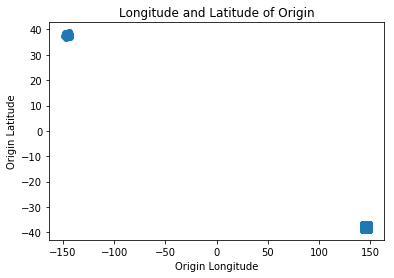

In [27]:
plt.scatter(df['origin_longitude'], df['origin_latitude'])
plt.title("Longitude and Latitude of Origin")
plt.xlabel("Origin Longitude")
plt.ylabel("Origin Latitude")
plt.show()

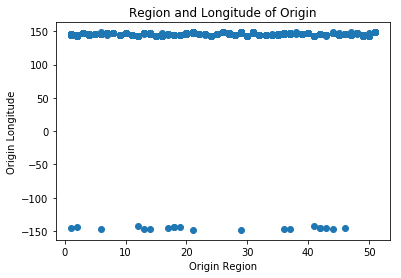

In [28]:
# find some syntactical errors
plt.scatter(df['origin_region'], df['origin_longitude'])
plt.title("Region and Longitude of Origin")
plt.xlabel("Origin Region")
plt.ylabel("Origin Longitude")
plt.show()

In [29]:
# incorrect longitude (longitude should be positive)
df[df['origin_longitude'] < 0]

id  drone_type  post_type  package_weight  origin_region  \
370    ID1531431789         3.0        0.0          14.366           44.0   
6496   ID5608507717         3.0        1.0          37.189           36.0   
6517   ID1412055200         1.0        0.0          28.087           43.0   
8545   ID1247225485         1.0        0.0          33.570           19.0   
12631  ID5534982327         1.0        1.0          23.433           17.0   
12667  ID5502916230         1.0        1.0          20.818           37.0   
14722  ID1916902378         3.0        0.0          22.404           13.0   
16746  ID1287166600         2.0        0.0           5.747           21.0   
18777  ID1899697260         2.0        0.0          33.833           42.0   
20838  ID1831150743         3.0        0.0          55.740           18.0   
20847  ID1227692676         1.0        0.0          32.046           12.0   
24924  ID5926921711         1.0        1.0          17.268           18.0   
24956  ID1185727933         1.0        0.0          51.169            2.0   
29028  ID1801307403         1.0        0.0          41.989           14.0   
29048  ID1786831706         3.0        0.0          13.561           41.0   
31091  ID1505346161         2.0        0.0          28.795           46.0   
35180  ID1283379763         1.0        0.0          16.484            6.0   
35200  ID1775604055         1.0        0.0          55.727           29.0   
35904  ID5344389008         1.0        1.0          25.866           42.0   
37215  ID1143662749         1.0        0.0          37.394            1.0   

       destination_region  origin_latitude  origin_longitude  \
370                  51.0        36.927946       -147.269413   
6496                 17.0        37.749943       -146.808957   
6517                 39.0        37.953760       -144.781399   
8545                 29.0        38.486636       -144.120204   
12631                 3.0        36.885898       -145.184300   
12667                 2.0        36.746097       -146.604478   
14722                 3.0        38.561164       -147.092809   
16746                25.0        38.582277       -148.092477   
18777                 7.0        38.029425       -146.072856   
20838                32.0        38.832801       -143.945225   
20847                13.0        37.663266       -143.016898   
24924                 1.0        38.877106       -143.941304   
24956                43.0        37.141006       -143.346034   
29028                24.0        37.159649       -146.672006   
29048                42.0        38.137149       -142.957831   
31091                47.0        37.294944       -145.712133   
35180                31.0        37.489079       -146.310993   
35200                49.0        37.438990       -148.379237   
35904                27.0        37.874005       -145.877859   
37215                 7.0        38.434528       -144.957685   

       destination_latitude  destination_longitude  journey_distance  \
370              -38.965905             148.336648           245.437   
6496             -36.979058             145.377456           152.981   
6517             -36.676108             145.765139           166.769   
8545             -37.361956             148.198966           379.363   
12631            -36.547959             147.244553           187.645   
12667            -37.097431             143.611150           269.230   
14722            -36.729669             147.086693           203.877   
16746            -37.764705             145.640058           233.103   
18777            -37.566261             147.765996           157.598   
20838            -37.313172             144.207678           170.717   
20847            -38.610134             147.333646           392.332   
24924            -38.486998             145.202642           117.894   
24956            -38.009330             144.836096           163.167   
29028            -38.888264             143.33

In [30]:
# make values positive
df['origin_longitude'] = df[['origin_longitude']].abs()

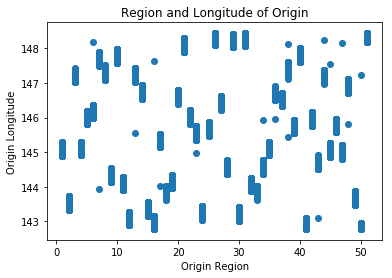

In [31]:
# display all longitude within the correct range now
plt.scatter(df['origin_region'], df['origin_longitude'])
plt.title("Region and Longitude of Origin")
plt.xlabel("Origin Region")
plt.ylabel("Origin Longitude")
plt.show()

##### I can find there are 16 weird points on the plot above. Those bugs can also be displayed by the boxplot as below.

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


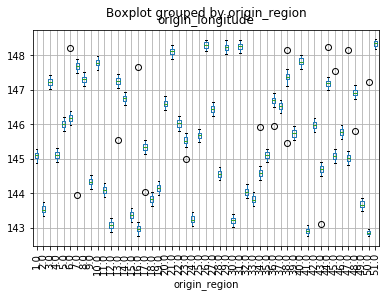

In [32]:
# find 16 outliers
df.boxplot(column=['origin_longitude'], by='origin_region', rot=90)

## 5. Origin Latitude (Syntactical Anomalies)

In [33]:
# find out there must be some syntactical errors
pd.DataFrame(df[['origin_latitude']], columns=['origin_latitude']).describe()

origin_latitude
count     39053.000000
mean        -37.760444
std           1.880509
min         -39.007000
25%         -38.506010
50%         -37.851278
75%         -37.091795
max          38.877106

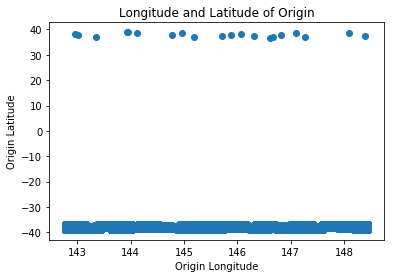

In [34]:
plt.scatter(df['origin_longitude'], df['origin_latitude'])
plt.title("Longitude and Latitude of Origin")
plt.xlabel("Origin Longitude")
plt.ylabel("Origin Latitude")
plt.show()

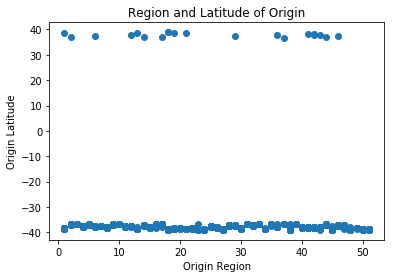

In [35]:
# find some syntactical errors
plt.scatter(df['origin_region'], df['origin_latitude'])
plt.title("Region and Latitude of Origin")
plt.xlabel("Origin Region")
plt.ylabel("Origin Latitude")
plt.show()

In [36]:
# incorrect latitude (latitude should be negative)
df[df['origin_latitude'] > 0]

id  drone_type  post_type  package_weight  origin_region  \
370    ID1531431789         3.0        0.0          14.366           44.0   
6496   ID5608507717         3.0        1.0          37.189           36.0   
6517   ID1412055200         1.0        0.0          28.087           43.0   
8545   ID1247225485         1.0        0.0          33.570           19.0   
12631  ID5534982327         1.0        1.0          23.433           17.0   
12667  ID5502916230         1.0        1.0          20.818           37.0   
14722  ID1916902378         3.0        0.0          22.404           13.0   
16746  ID1287166600         2.0        0.0           5.747           21.0   
18777  ID1899697260         2.0        0.0          33.833           42.0   
20838  ID1831150743         3.0        0.0          55.740           18.0   
20847  ID1227692676         1.0        0.0          32.046           12.0   
24924  ID5926921711         1.0        1.0          17.268           18.0   
24956  ID1185727933         1.0        0.0          51.169            2.0   
29028  ID1801307403         1.0        0.0          41.989           14.0   
29048  ID1786831706         3.0        0.0          13.561           41.0   
31091  ID1505346161         2.0        0.0          28.795           46.0   
35180  ID1283379763         1.0        0.0          16.484            6.0   
35200  ID1775604055         1.0        0.0          55.727           29.0   
35904  ID5344389008         1.0        1.0          25.866           42.0   
37215  ID1143662749         1.0        0.0          37.394            1.0   

       destination_region  origin_latitude  origin_longitude  \
370                  51.0        36.927946        147.269413   
6496                 17.0        37.749943        146.808957   
6517                 39.0        37.953760        144.781399   
8545                 29.0        38.486636        144.120204   
12631                 3.0        36.885898        145.184300   
12667                 2.0        36.746097        146.604478   
14722                 3.0        38.561164        147.092809   
16746                25.0        38.582277        148.092477   
18777                 7.0        38.029425        146.072856   
20838                32.0        38.832801        143.945225   
20847                13.0        37.663266        143.016898   
24924                 1.0        38.877106        143.941304   
24956                43.0        37.141006        143.346034   
29028                24.0        37.159649        146.672006   
29048                42.0        38.137149        142.957831   
31091                47.0        37.294944        145.712133   
35180                31.0        37.489079        146.310993   
35200                49.0        37.438990        148.379237   
35904                27.0        37.874005        145.877859   
37215                 7.0        38.434528        144.957685   

       destination_latitude  destination_longitude  journey_distance  \
370              -38.965905             148.336648           245.437   
6496             -36.979058             145.377456           152.981   
6517             -36.676108             145.765139           166.769   
8545             -37.361956             148.198966           379.363   
12631            -36.547959             147.244553           187.645   
12667            -37.097431             143.611150           269.230   
14722            -36.729669             147.086693           203.877   
16746            -37.764705             145.640058           233.103   
18777            -37.566261             147.765996           157.598   
20838            -37.313172             144.207678           170.717   
20847            -38.610134             147.333646           392.332   
24924            -38.486998             145.202642           117.894   
24956            -38.009330             144.836096           163.167   
29028            -38.888264             143.33

In [37]:
# the function for converting the positive values to negative ones 
def convert_origin_latitude(row):
    negative = row['origin_latitude'] - (2*row['origin_latitude'])
    return negative

# call the function (the type of the outcome is series)
# axis=1 or ‘columns’: apply function to each row.
lat_series = df.apply(convert_origin_latitude, axis=1)

# add the result into data frame and name it 'correct_lat'
df['correct_lat'] = pd.Series(lat_series, index=df.index)

# replace those wrong latitude with the correct ones
df['origin_latitude'] = np.where(df['origin_latitude'] > 0, df['correct_lat'], df['origin_latitude'])

# drop the unused column
df.drop(df[['correct_lat']], axis=1, inplace=True)

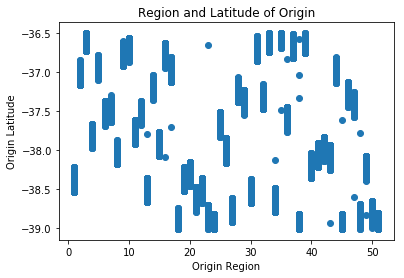

In [38]:
# display all latitude within the correct range now
plt.scatter(df['origin_region'], df['origin_latitude'])
plt.title("Region and Latitude of Origin")
plt.xlabel("Origin Region")
plt.ylabel("Origin Latitude")
plt.show()

##### I can find there are 15 weird points on the plot above. Those bugs can also be displayed by the boxplot as below.

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


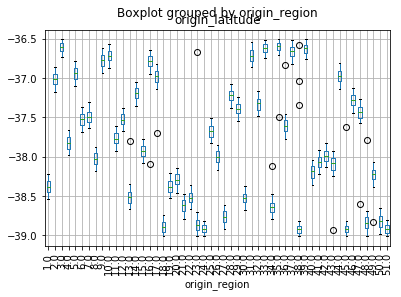

In [39]:
# find 15 anomalies
df.boxplot(column=['origin_latitude'], by='origin_region', rot=90)

## 6. Destination Longitude (Syntactical Anomalies)
>Now we can see origin_latitude and origin_longitude look reasonable because origin_latitude are all negative and origin_longitude are all positve. Then, I will revise the data about destination by the same approach as dealing with the origin data. <br><br>
**Still find out something wrong in the destination data** <br>
With the describtion below, destination_latitude should be negative but max is positive; destination_longitude should be positive but min is negative. I'll make the plot below to show the data anomalies.

In [40]:
# find out there must be some syntactical errors
pd.DataFrame(df[['destination_longitude']], columns=['destination_longitude']).describe()

destination_longitude
count           39053.000000
mean              145.441697
std                 6.791054
min              -148.323485
25%               144.108685
50%               145.624633
75%               147.082024
max               148.449555

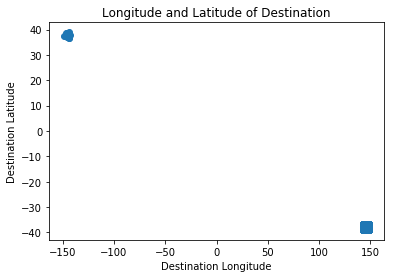

In [41]:
# find out something wrong here
plt.scatter(df['destination_longitude'], df['destination_latitude'])
plt.title("Longitude and Latitude of Destination")
plt.xlabel("Destination Longitude")
plt.ylabel("Destination Latitude")
plt.show()

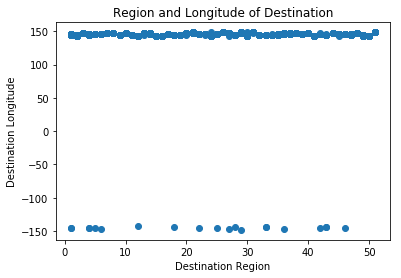

In [42]:
# find the syntactical errors
plt.scatter(df['destination_region'], df['destination_longitude'])
plt.title("Region and Longitude of Destination")
plt.xlabel("Destination Region")
plt.ylabel("Destination Longitude")
plt.show()

In [43]:
# find the incorrect values in destination_longitude (longitude here should be positive)
df[df['destination_longitude'] < 0]

id  drone_type  post_type  package_weight  origin_region  \
397    ID1826565900         1.0        0.0          45.424           18.0   
402    ID1140280353         2.0        0.0          12.287           49.0   
2465   ID1599932425         1.0        0.0          44.949           21.0   
6545   ID1222033877         3.0        0.0          33.737            5.0   
8587   ID1869536363         2.0        0.0           5.422           37.0   
10644  ID5554928475         2.0        1.0          14.383           19.0   
10653  ID1643875457         2.0        0.0          41.360            8.0   
12697  ID1611117113         3.0        0.0          34.926           35.0   
14746  ID1460191276         3.0        0.0          33.334           35.0   
16451  ID1583080767         1.0        0.0          17.740            9.0   
18837  ID1415454095         3.0        0.0           8.625           40.0   
18838  ID1169679508         3.0        0.0          22.692           51.0   
18862  ID1500100240         2.0        0.0          17.217           49.0   
22946  ID1747256623         2.0        0.0          31.801           29.0   
22957  ID1653889833         1.0        0.0          24.660           25.0   
25000  ID1960230909         2.0        0.0          45.794           24.0   
27039  ID5630388949         3.0        1.0          43.219           20.0   
29099  ID1659625853         2.0        0.0          22.702           49.0   
33516  ID1279542359         3.0        0.0          34.281           14.0   
37283  ID1437942225         3.0        0.0          19.754           29.0   

       destination_region  origin_latitude  origin_longitude  \
397                  28.0       -38.951928        144.022819   
402                  18.0       -38.086004        143.692604   
2465                 27.0       -38.629535        148.112450   
6545                 46.0       -36.855038        145.914026   
8587                 36.0       -36.585908        146.545732   
10644                 6.0       -38.410793        144.151900   
10653                 4.0       -38.123035        147.390270   
12697                25.0       -36.688183        144.956100   
14746                 4.0       -36.522123        144.925864   
16451                42.0       -36.911641        144.159735   
18837                 1.0       -38.297302        147.887833   
18838                33.0       -38.906234        148.307318   
18862                22.0       -38.269109        143.491429   
22946                12.0       -37.278640        148.359540   
22957                43.0       -37.761721        145.640286   
25000                 1.0       -38.856913        143.396744   
27039                43.0       -38.455923        146.774797   
29099                 5.0       -38.188421        143.790202   
33516                29.0       -37.177422        146.893169   
37283                33.0       -37.419589        148.379967   

       destination_latitude  destination_longitude  journey_distance  \
397               37.228432            -144.440287           195.309   
402               38.910056            -143.941804            94.265   
2465              38.734194            -146.570663           134.481   
6545              37.271735            -145.667470            51.296   
8587              37.510780            -146.774747           104.945   
10644             37.655062            -146.279866           204.661   
10653             37.950428            -144.995678           210.818   
12697             37.809808            -145.629930           138.397   
14746             37.797911            -145.168782           143.643   
16451             37.934679            -145.970282           196.433   
18837             38.353046            -145.100751           243.462   
18838             36.597501            -143.766795           475.043   
18862             38.552254            -146.115935           231.075   
22946             37.666578            -143.09

In [44]:
# make values positive
df['destination_longitude'] = df[['destination_longitude']].abs()

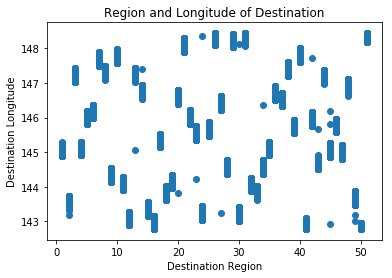

In [45]:
# display all longitude within the correct range now
plt.scatter(df['destination_region'], df['destination_longitude'])
plt.title("Region and Longitude of Destination")
plt.xlabel("Destination Region")
plt.ylabel("Destination Longitude")
plt.show()

##### I can find there are 15 weird points on the plot above. Those bugs can also be shown by the boxplot as below.

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


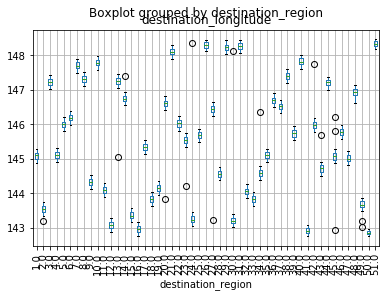

In [46]:
# find 16 anomalies
df.boxplot(column=['destination_longitude'], by='destination_region', rot=90)

## 7. Destination Latitude (Syntactical Anomalies)

In [47]:
# find out there must be some syntactical errors
pd.DataFrame(df[['destination_latitude']], columns=['destination_latitude']).describe()

destination_latitude
count          39053.000000
mean             -37.753496
std                1.880151
min              -39.007000
25%              -38.503470
50%              -37.828724
75%              -37.080815
max               38.910056

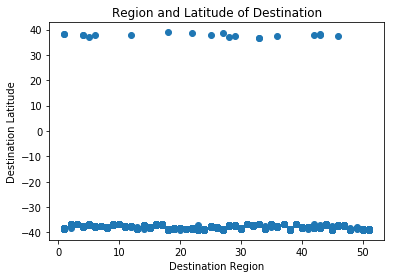

In [48]:
# find the syntactical errors
plt.scatter(df['destination_region'], df['destination_latitude'])
plt.title("Region and Latitude of Destination")
plt.xlabel("Destination Region")
plt.ylabel("Destination Latitude")
plt.show()

In [49]:
# find the incorrect values in destination_latitude (latitude here should be negative)
df[df['destination_latitude'] > 0]

id  drone_type  post_type  package_weight  origin_region  \
397    ID1826565900         1.0        0.0          45.424           18.0   
402    ID1140280353         2.0        0.0          12.287           49.0   
2465   ID1599932425         1.0        0.0          44.949           21.0   
6545   ID1222033877         3.0        0.0          33.737            5.0   
8587   ID1869536363         2.0        0.0           5.422           37.0   
10644  ID5554928475         2.0        1.0          14.383           19.0   
10653  ID1643875457         2.0        0.0          41.360            8.0   
12697  ID1611117113         3.0        0.0          34.926           35.0   
14746  ID1460191276         3.0        0.0          33.334           35.0   
16451  ID1583080767         1.0        0.0          17.740            9.0   
18837  ID1415454095         3.0        0.0           8.625           40.0   
18838  ID1169679508         3.0        0.0          22.692           51.0   
18862  ID1500100240         2.0        0.0          17.217           49.0   
22946  ID1747256623         2.0        0.0          31.801           29.0   
22957  ID1653889833         1.0        0.0          24.660           25.0   
25000  ID1960230909         2.0        0.0          45.794           24.0   
27039  ID5630388949         3.0        1.0          43.219           20.0   
29099  ID1659625853         2.0        0.0          22.702           49.0   
33516  ID1279542359         3.0        0.0          34.281           14.0   
37283  ID1437942225         3.0        0.0          19.754           29.0   

       destination_region  origin_latitude  origin_longitude  \
397                  28.0       -38.951928        144.022819   
402                  18.0       -38.086004        143.692604   
2465                 27.0       -38.629535        148.112450   
6545                 46.0       -36.855038        145.914026   
8587                 36.0       -36.585908        146.545732   
10644                 6.0       -38.410793        144.151900   
10653                 4.0       -38.123035        147.390270   
12697                25.0       -36.688183        144.956100   
14746                 4.0       -36.522123        144.925864   
16451                42.0       -36.911641        144.159735   
18837                 1.0       -38.297302        147.887833   
18838                33.0       -38.906234        148.307318   
18862                22.0       -38.269109        143.491429   
22946                12.0       -37.278640        148.359540   
22957                43.0       -37.761721        145.640286   
25000                 1.0       -38.856913        143.396744   
27039                43.0       -38.455923        146.774797   
29099                 5.0       -38.188421        143.790202   
33516                29.0       -37.177422        146.893169   
37283                33.0       -37.419589        148.379967   

       destination_latitude  destination_longitude  journey_distance  \
397               37.228432             144.440287           195.309   
402               38.910056             143.941804            94.265   
2465              38.734194             146.570663           134.481   
6545              37.271735             145.667470            51.296   
8587              37.510780             146.774747           104.945   
10644             37.655062             146.279866           204.661   
10653             37.950428             144.995678           210.818   
12697             37.809808             145.629930           138.397   
14746             37.797911             145.168782           143.643   
16451             37.934679             145.970282           196.433   
18837             38.353046             145.100751           243.462   
18838             36.597501             143.766795           475.043   
18862             38.552254             146.115935           231.075   
22946             37.666578             143.09

In [50]:
# the function for converting the positive values to negative ones 
def convert_des_latitude(row):
    negative = row['destination_latitude'] - (2*row['destination_latitude'])
    return negative

# call the function (the type of the outcome is series)
# axis=1 or ‘columns’: apply function to each row.
des_lat_series = df.apply(convert_des_latitude, axis=1)

# add the result into data frame and name it 'correct_lat'
df['correct_des_lat'] = pd.Series(des_lat_series, index=df.index)

# replace those wrong latitude
df['destination_latitude'] = np.where(df['destination_latitude'] > 0, df['correct_des_lat'], df['destination_latitude'])

# drop the unused column
df.drop(df[['correct_des_lat']], axis=1, inplace=True)

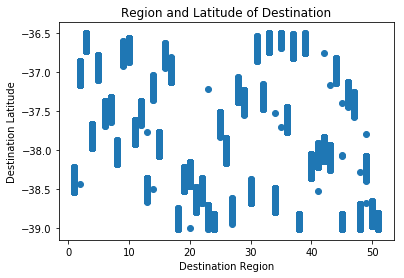

In [51]:
# display all latitude within the correct range now
plt.scatter(df['destination_region'], df['destination_latitude'])
plt.title("Region and Latitude of Destination")
plt.xlabel("Destination Region")
plt.ylabel("Destination Latitude")
plt.show()

##### I can find there are 15 weird points on the plot above. Those bugs can also be shown by the boxplot as below.

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


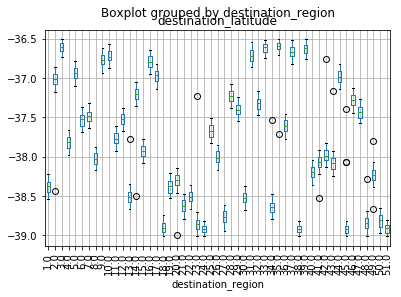

In [52]:
# find 15 anomalies
df.boxplot(column=['destination_latitude'], by='destination_region', rot=90)

#### After revising latitude and longitude, now we can find each value looks more reasonable

In [53]:
# check the updated latitude & longitude
pd.DataFrame(df[['origin_latitude', 'origin_longitude', 'destination_latitude', 'destination_longitude']], columns=['origin_latitude', 'origin_longitude', 'destination_latitude', 'destination_longitude']).describe()

origin_latitude  origin_longitude  destination_latitude  \
count     39053.000000      39053.000000          39053.000000   
mean        -37.799174        145.590149            -37.792179   
std           0.780896          1.666936              0.782645   
min         -39.007000        142.770634            -39.007000   
25%         -38.506184        144.120511            -38.503470   
50%         -37.852093        145.623596            -37.829504   
75%         -37.093180        147.067670            -37.082702   
max         -36.507747        148.449555            -36.507747   

       destination_longitude  
count           39053.000000  
mean              145.590519  
std                 1.674958  
min               142.770634  
25%               144.111018  
50%               145.625773  
75%               147.082024  
max               148.449555

## 8. Origin Region (Coverage Anomalies)

In [54]:
df[df['origin_region'].isnull()]

id  drone_type  post_type  package_weight  origin_region  \
1160   ID5376086517         2.0        1.0          29.643            NaN   
4134   ID1332965644         1.0        0.0          29.378            NaN   
8234   ID5967949719         1.0        1.0          20.677            NaN   
22532  ID1452063029         1.0        0.0          31.484            NaN   
22571  ID1459975115         1.0        0.0          44.412            NaN   
26663  ID1701407133         3.0        0.0          36.620            NaN   
28705  ID1831397631         2.0        0.0          27.999            NaN   
36188  ID5963142679         2.0        1.0          18.374            NaN   
36883  ID1754392493         1.0        0.0          23.836            NaN   
36885  ID1533736875         1.0        0.0          14.635            NaN   

       destination_region  origin_latitude  origin_longitude  \
1160                 39.0       -38.751289        146.397686   
4134                 22.0       -36.800377        142.831752   
8234                 51.0       -37.355283        147.819681   
22532                24.0       -37.306383        144.612877   
22571                39.0       -38.203109        144.782949   
26663                29.0       -36.634106        144.380683   
28705                16.0       -37.015159        143.362798   
36188                23.0       -38.025592        147.397594   
36883                40.0       -37.926931        147.271935   
36885                44.0       -37.557582        143.205611   

       destination_latitude  destination_longitude  journey_distance  \
1160             -36.568259             145.576172           253.560   
4134             -38.639850             145.898941           338.888   
8234             -38.919900             148.230116           177.836   
22532            -38.863670             143.229729           211.506   
22571            -36.550218             145.808347           205.134   
26663            -37.395977             148.189978           349.018   
28705            -36.820033             143.054551            34.991   
36188            -38.814449             145.625097           177.782   
36883            -38.329166             147.994767            77.531   
36885            -36.973500             147.245077           363.685   

      departure_date departure_time  travel_time delivery_time  delivery_fare  
1160      2018-06-20       06:18:47       202.42       9:41:12         157.22  
4134      2018-03-02       04:02:06       275.04       8:37:08         129.03  
8234      2018-05-16       19:45:43       147.90      22:13:37         134.61  
22532     2018-07-26       01:41:20       174.48       4:35:48         119.30  
22571     2018-06-07       17:16:48       169.45      20:06:14         102.81  
26663     2018-03-28       10:48:14       272.29      15:20:31         173.22  
28705     2018-04-23       00:00:43        34.29       0:35:00         142.50  
36188     2018-07-09       22:39:04       144.13       1:03:11         182.59  
36883     2018-02-11       12:00:31        68.71      13:09:13          91.64  
36885     2018-04-01       03:03:24       294.62       7:58:01         134.85

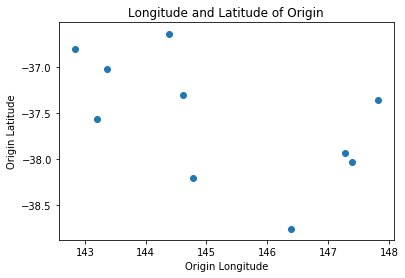

In [55]:
# plot those null values
null_region_df = df[df['origin_region'].isnull()]

# plot the distribution of the latitude and longitude of the NaN region
plt.scatter(null_region_df['origin_longitude'], null_region_df['origin_latitude'])
plt.title("Longitude and Latitude of Origin")
plt.xlabel("Origin Longitude")
plt.ylabel("Origin Latitude")
plt.show()

In [56]:
# total regions are 51 (include NaN is 52)
len(df['origin_region'].unique())

52

####  plot different regions in different colors

In [57]:
# set colors to differentiate the region later
colors = ['#00ffff', '#191970', '#6495ed', '#8470ff', '#0000ff', '#00bfff', 
          '#00ced1', '#7cfc00', '#9acd32', '#228b22', '#6b8e23', '#f0e68c', 
          '#ffd700', '#bc8f8f', '#cd5c5c', '#cd853f', '#ff69b4', '#ff1493', 
          '#ffc0cb', '#b03060', '#d02090', '#da70d6', '#9932cc', '#bdb76b', 
          '#8b8989', '#f8f8ff', '#cdc0b0', '#e6e6fa', '#f5fffa', '#f0f8ff', 
          '#fff0f5', '#000000', '#ffa07a', '#ff0000', '#ff6347', '#ffe4c4', 
          '#8b8b83', '#778899', '#1e90ff', '#40e0d0', '#66cdaa', '#7fffd4', 
          '#ffff00', '#b22222', '#d2691e', '#87ceeb', '#4682b4', '#87cefa', 
          '#5f9ea0', '#000080', '#3cb371']

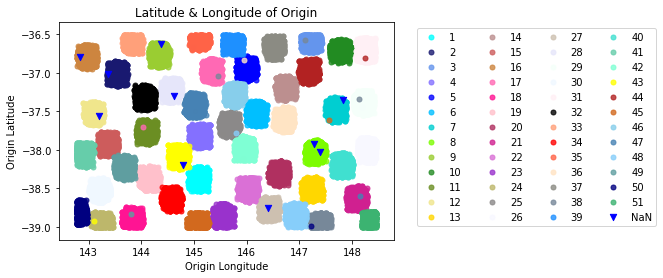

In [58]:
def origin_region_plot():
    null_region_df = df[df['origin_region'].isnull()]
    for each in range(1, 52):
        region_each = df[df['origin_region'] == each]
        x = region_each['origin_longitude']
        y = region_each['origin_latitude']
        plt.scatter(x, y, c=colors[each-1], s=25, alpha=0.8, label=each) # marker='o', 

    x_null = null_region_df['origin_longitude']
    y_null = null_region_df['origin_latitude']
    plt.scatter(x_null, y_null, marker='v', s=40, c='b', label='NaN')
    plt.xlabel('Origin Longitude')
    plt.ylabel('Origin Latitude')
    plt.title('Latitude & Longitude of Origin')

    plt.legend(loc='lower right', bbox_to_anchor=(1.8,0.04), ncol=4)
    plt.show()
    
origin_region_plot()

In [59]:
# correspond to the plot above
origin_region_array = df['origin_region'].unique()
region = np.sort(origin_region_array)
print("Origin Regions:\n", region)
print("\nThere are", len(region)-1, "origin regions.")

Origin Regions:
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. nan]

There are 51 origin regions.


In [60]:
# function for getting the region
def get_origin_region(row):
    lat_gap_lst = []
    for each in lat_median_lst:
        lat_gap = row['origin_latitude'] - each
        lat_gap_lst.append(lat_gap)
    long_gap_lst = []
    for each in long_median_lst:
        long_gap = row['origin_longitude'] - each
        long_gap_lst.append(long_gap)
    
    gap_lst = [lat**2 + long**2 for lat, long in zip(lat_gap_lst, long_gap_lst)]
    region = gap_lst.index(min(gap_lst)) + 1
    return region

In [61]:
lat_median_lst = []
long_median_lst = []
for number in range(1, len(df['origin_region'].unique())): # compare each region
    region_df = df.loc[df['origin_region'] == number] # get region one by one
    region_df = region_df.reset_index() # reset the index
    
    # get the median of latitude & longitude
    origin_lat_median = region_df['origin_latitude'].median()
    origin_long_median = region_df['origin_longitude'].median()
    
    lat_median_lst.append(origin_lat_median)
    long_median_lst.append(origin_long_median)

# call the function
origin_region_series = df.apply(get_origin_region, axis=1)

# add the result into data frame named 'get_origin_region'
df['get_origin_region'] = pd.Series(origin_region_series, index=df.index)

# replace those wrong and NaN values
df['origin_region'] = np.where(((df['origin_region'].isnull()) | (df['origin_region'] != 0)), df['get_origin_region'], df['origin_region'])

# drop the unused column
df.drop(df[['get_origin_region']], axis=1, inplace=True)

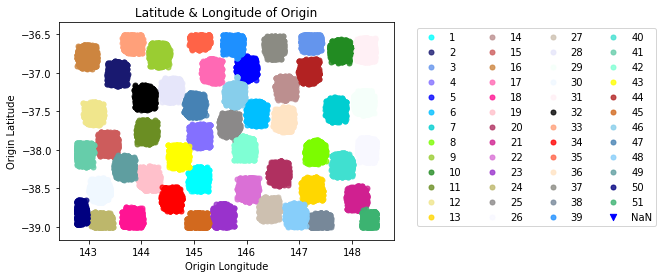

In [62]:
# now the region will be all correct
origin_region_plot()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


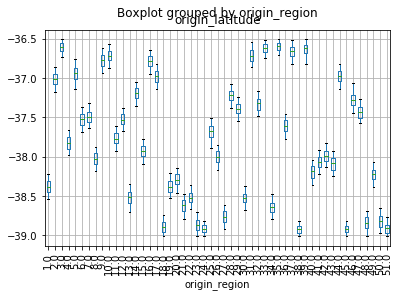

In [63]:
# latitude vs origin region
df.boxplot(column=['origin_latitude'], by='origin_region', rot=90)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


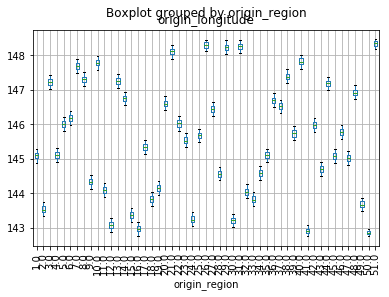

In [64]:
# longitude vs origin region
df.boxplot(column=['origin_longitude'], by='origin_region', rot=90)

## 9. Destination Region (Coverage Anomalies)

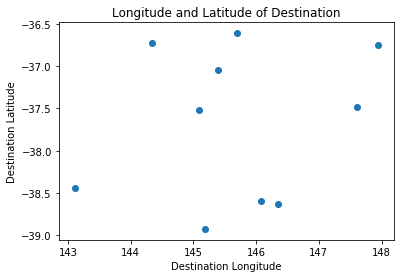

In [65]:
# plot those null values
null_destination_region_df = df[df['destination_region'].isnull()]

# plot the distribution of the latitude and longitude of the NaN region
plt.scatter(null_destination_region_df['destination_longitude'], null_destination_region_df['destination_latitude'])
plt.title("Longitude and Latitude of Destination")
plt.xlabel("Destination Longitude")
plt.ylabel("Destination Latitude")
plt.show()

#### plot different regions in different colors

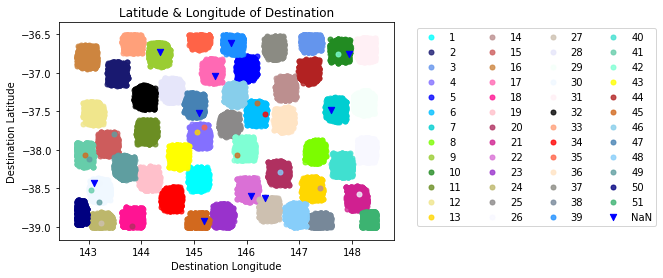

In [66]:
def destination_region_plot():
    null_region_df = df[df['destination_region'].isnull()]
    for each in range(1, 52):
        region_each = df[df['destination_region'] == each]
        x = region_each['destination_longitude']
        y = region_each['destination_latitude']
        plt.scatter(x, y, c=colors[each-1], s=25, alpha=0.8, label=each) # marker='o',

    x_null = null_region_df['destination_longitude']
    y_null = null_region_df['destination_latitude']
    plt.scatter(x_null, y_null, marker='v', s=40, c='b', label='NaN')
    plt.xlabel('Destination Longitude')
    plt.ylabel('Destination Latitude')
    plt.title('Latitude & Longitude of Destination')

    plt.legend(loc='lower right', bbox_to_anchor=(1.8,0.04), ncol=4)
    plt.show()
destination_region_plot()

In [67]:
# correspond to the plot above
origin_region_array = df['destination_region'].unique()
region = np.sort(origin_region_array)
print("Destination Regions:\n", region)
print("\nThere are", len(region)-1, "destination regions.")

Destination Regions:
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. nan]

There are 51 destination regions.


In [68]:
# function for getting the region
def get_destination_region(row):
    lat_gap_lst = []
    for each in lat_median_lst:
        lat_gap = row['destination_latitude'] - each
        lat_gap_lst.append(lat_gap)
    long_gap_lst = []
    for each in long_median_lst:
        long_gap = row['destination_longitude'] - each
        long_gap_lst.append(long_gap)
    
    gap_lst = [lat**2 + long**2 for lat, long in zip(lat_gap_lst, long_gap_lst)]
    region = gap_lst.index(min(gap_lst)) + 1
    return region

In [69]:
lat_median_lst = []
long_median_lst = []
for number in range(1, len(df['destination_region'].unique())): # compare each region
    region_df = df.loc[df['destination_region'] == number] # get region one by one
    region_df = region_df.reset_index() # reset the index
    
    # get the median of latitude & longitude
    origin_lat_median = region_df['destination_latitude'].median()
    origin_long_median = region_df['destination_longitude'].median()
    
    lat_median_lst.append(origin_lat_median)
    long_median_lst.append(origin_long_median)

# call the function
destination_region_series = df.apply(get_destination_region, axis=1)

# add the result into data frame named 'get_destination_region'
df['get_destination_region'] = pd.Series(destination_region_series, index=df.index)

# replace those wrong and NaN values
df['destination_region'] = np.where(((df['destination_region'].isnull()) | (df['destination_region'] != 0)), df['get_destination_region'], df['destination_region'])

# drop the unused column
df.drop(df[['get_destination_region']], axis=1, inplace=True)

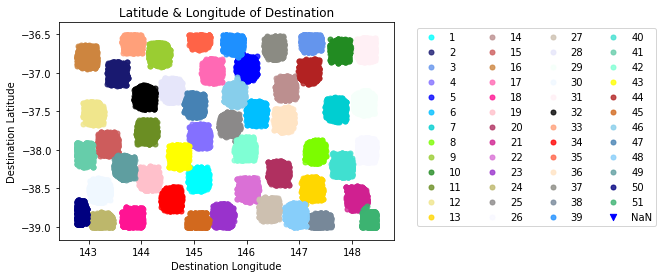

In [70]:
# now the region will be all correct
destination_region_plot()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


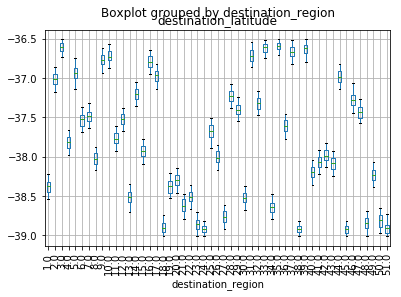

In [71]:
# latitude vs destination region
df.boxplot(column=['destination_latitude'], by='destination_region', rot=90)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


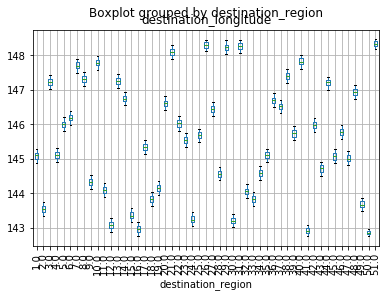

In [72]:
# longitude vs destination region
df.boxplot(column=['destination_longitude'], by='destination_region', rot=90)

## 10. Distance (Semantic Anomalies)
>I am going to use Haversine formula to calculate the distance of two points on the earth. Moreover, there will be some semantic errors which the calculation result is different from the original one (journey_distance). Then, I'll replace those original values with the correct ones.

In [73]:
# the function for calculating distance (the haversine formula)
def calculate_dist(row):
    dist = 6378 * acos(sin(radians(row['origin_latitude']))*sin(radians(row['destination_latitude'])) + cos(radians(row['origin_latitude']))*cos(radians(row['destination_latitude']))*cos(radians(row['origin_longitude']) - radians(row['destination_longitude'])))
    distance = round(dist, 3)
    return distance

# axis=1 or ‘columns’: apply function to each row
dist_series = df.apply(calculate_dist, axis=1)

# add the result of calculation into data frame named 'cal_result'
df['cal_result'] = pd.Series(dist_series, index=df.index)

# find which journey_distance is different from cal_result
df['comparison'] = np.where(round(df['journey_distance'], 3) == df['cal_result'], 'same', 'diff')
# df

In [74]:
# find the incorrect values
df[df['comparison'] == 'diff']

id  drone_type  post_type  package_weight  origin_region  \
2296   ID1705049236         2.0        0.0           9.081           32.0   
4341   ID1330102697         1.0        0.0          10.282           15.0   
4347   ID1113351913         2.0        0.0          12.830           20.0   
10477  ID1821548757         1.0        0.0          42.534            7.0   
18666  ID1343658909         1.0        0.0          42.766           30.0   
20718  ID1978997697         1.0        0.0           7.822            8.0   
22764  ID5252861325         2.0        1.0          41.900           34.0   
24822  ID1412879222         1.0        0.0          31.222           11.0   
25308  ID1907559533         1.0        0.0          19.198           39.0   
28916  ID1656856619         2.0        0.0          13.947           20.0   
30946  ID5445684452         1.0        1.0          14.169           41.0   
30972  ID1436006303         2.0        0.0          32.356            8.0   
33492  ID1903472014         1.0        0.0          13.202           34.0   
37103  ID1951245543         3.0        0.0          10.734           10.0   
37107  ID5127292011         2.0        1.0          37.708           27.0   

       destination_region  origin_latitude  origin_longitude  \
2296                 12.0       -37.279261        144.064530   
4341                  4.0       -37.947939        143.562560   
4347                 31.0       -38.297165        146.760937   
10477                24.0       -37.383624        147.878180   
18666                13.0       -38.393237        143.354901   
20718                 9.0       -38.084592        147.231392   
22764                24.0       -38.585965        144.547681   
24822                49.0       -37.658768        144.282355   
25308                47.0       -36.622843        145.903415   
28916                20.0       -38.348027        146.449706   
30946                27.0       -38.014803        142.858125   
30972                26.0       -38.144037        147.257725   
33492                11.0       -38.741373        144.593493   
37103                17.0       -36.659662        147.678328   
37107                 1.0       -38.830302        146.407329   

       destination_latitude  destination_longitude  journey_distance  \
2296             -37.496744             143.013784           101.035   
4341             -37.749968             145.223403           150.539   
4347             -36.743274             148.310241           226.017   
10477            -38.898325             143.074399           452.536   
18666            -38.523618             147.253369           339.806   
20718            -36.791153             144.220909           304.722   
22764            -38.955914             143.301923           119.294   
24822            -38.273898             143.867449            83.054   
25308            -37.298888             145.018297           106.410   
28916            -38.251032             146.553415            14.395   
30946            -38.809921             146.546661           335.952   
30972            -37.995868             148.227456            89.668   
33492            -37.910306             144.138498           101.883   
37103            -36.926471             145.336176           216.083   
37107            -38.309287             145.072706           138.229   

      departure_date departure_time  travel_time delivery_time  delivery_fare  \
2296      2018-07-26       10:55:34        81.25      12:16:49         108.60   
4341      2018-05-21       22:19:18       124.06       0:23:21         112.41   
4347      2018-04-11       07:45:34       177.00      10:42:34         123.84   
10477     2018-03-21       18:25:23       365.16       0:30:32         129.54   
18666     2018-06-21       14:10:54       276.00      18:46:54         114.33   
20718     2018-07-18       14:31:49       246.33      18:38:08         105.45   
22764     2018-03-04       00:48:28    

In [75]:
# replace those different (incorrect) distance data with the calculated (correct) ones
df['journey_distance'] = np.where(df['comparison'] == 'diff', df['cal_result'], df['journey_distance'])
df[df['comparison'] == 'diff']

id  drone_type  post_type  package_weight  origin_region  \
2296   ID1705049236         2.0        0.0           9.081           32.0   
4341   ID1330102697         1.0        0.0          10.282           15.0   
4347   ID1113351913         2.0        0.0          12.830           20.0   
10477  ID1821548757         1.0        0.0          42.534            7.0   
18666  ID1343658909         1.0        0.0          42.766           30.0   
20718  ID1978997697         1.0        0.0           7.822            8.0   
22764  ID5252861325         2.0        1.0          41.900           34.0   
24822  ID1412879222         1.0        0.0          31.222           11.0   
25308  ID1907559533         1.0        0.0          19.198           39.0   
28916  ID1656856619         2.0        0.0          13.947           20.0   
30946  ID5445684452         1.0        1.0          14.169           41.0   
30972  ID1436006303         2.0        0.0          32.356            8.0   
33492  ID1903472014         1.0        0.0          13.202           34.0   
37103  ID1951245543         3.0        0.0          10.734           10.0   
37107  ID5127292011         2.0        1.0          37.708           27.0   

       destination_region  origin_latitude  origin_longitude  \
2296                 12.0       -37.279261        144.064530   
4341                  4.0       -37.947939        143.562560   
4347                 31.0       -38.297165        146.760937   
10477                24.0       -37.383624        147.878180   
18666                13.0       -38.393237        143.354901   
20718                 9.0       -38.084592        147.231392   
22764                24.0       -38.585965        144.547681   
24822                49.0       -37.658768        144.282355   
25308                47.0       -36.622843        145.903415   
28916                20.0       -38.348027        146.449706   
30946                27.0       -38.014803        142.858125   
30972                26.0       -38.144037        147.257725   
33492                11.0       -38.741373        144.593493   
37103                17.0       -36.659662        147.678328   
37107                 1.0       -38.830302        146.407329   

       destination_latitude  destination_longitude  journey_distance  \
2296             -37.496744             143.013784            96.035   
4341             -37.749968             145.223403           147.639   
4347             -36.743274             148.310241           220.517   
10477            -38.898325             143.074399           453.036   
18666            -38.523618             147.253369           340.106   
20718            -36.791153             144.220909           302.522   
22764            -38.955914             143.301923           115.694   
24822            -38.273898             143.867449            77.554   
25308            -37.298888             145.018297           108.910   
28916            -38.251032             146.553415            14.095   
30946            -38.809921             146.546661           333.652   
30972            -37.995868             148.227456            86.568   
33492            -37.910306             144.138498           100.683   
37103            -36.926471             145.336176           210.883   
37107            -38.309287             145.072706           129.829   

      departure_date departure_time  travel_time delivery_time  delivery_fare  \
2296      2018-07-26       10:55:34        81.25      12:16:49         108.60   
4341      2018-05-21       22:19:18       124.06       0:23:21         112.41   
4347      2018-04-11       07:45:34       177.00      10:42:34         123.84   
10477     2018-03-21       18:25:23       365.16       0:30:32         129.54   
18666     2018-06-21       14:10:54       276.00      18:46:54         114.33   
20718     2018-07-18       14:31:49       246.33      18:38:08         105.45   
22764     2018-03-04       00:48:28    

In [76]:
# remove unused columns
df.drop(df[['cal_result', 'comparison']], axis=1, inplace=True)

## 11. Travel Time (Semantic Anomalies)
>Travel time is the duration of the journey. There are some possible errors like:
<br>
1. delivery time (O); travel time (X)
2. delivery time (X); travel time (O)
3. departure time (O); travel time (X)
4. delivery time (X); travel time (O)
<br><br>
It will be impossible that two of three elements are incorrect. Also, we have the correct distance right now. Therefore, we can first remove those incorrect time value and depend on the known distance to calculate the average distance and the average time. Based on these two values, it will be easy to get the speed of each different drone type. After getting the speed of each drone type, we are able to calculate and compare which values (given travel time or the calculated one) may be more accurate. In consequence, I'll revise those errors and replace those NaN values with the correct ones.

In [77]:
df[df['travel_time'].isnull()]

id  drone_type  post_type  package_weight  origin_region  \
92     ID5367905203         3.0        1.0          24.762           40.0   
465    ID1294216153         1.0        0.0          23.795           21.0   
2121   ID5220526383         3.0        1.0          13.939           18.0   
2122   ID1482471480         3.0        0.0          15.303           22.0   
2123   ID1863716719         1.0        0.0          10.666           47.0   
2126   ID5177076169         1.0        1.0          14.476           42.0   
4545   ID1282110867         3.0        0.0          40.149           18.0   
4562   ID1862351779         2.0        0.0          19.149           43.0   
6235   ID1270345414         3.0        0.0           5.227           16.0   
6563   ID5799949118         3.0        1.0          16.669           12.0   
8654   ID5731740132         3.0        1.0          36.210           40.0   
10335  ID5187977872         1.0        1.0          28.757            4.0   
11337  ID5356516355         3.0        1.0          10.894           46.0   
12732  ID1292861504         3.0        0.0          19.997           19.0   
12741  ID1509537774         2.0        0.0          20.837            2.0   
13927  ID1370035170         1.0        0.0           7.617           41.0   
14694  ID1188292458         1.0        0.0          39.029           32.0   
15098  ID1291288857         3.0        0.0           7.820           39.0   
16491  ID1595868000         1.0        0.0          21.244            2.0   
18531  ID1250329105         1.0        0.0          24.684            3.0   
18868  ID5165696136         1.0        1.0          41.369            4.0   
20573  ID1417138330         1.0        0.0          28.175           17.0   
22597  ID5588161268         1.0        1.0          37.252            1.0   
22602  ID1299869553         3.0        0.0          21.861           50.0   
24993  ID1907367284         3.0        0.0          17.002           31.0   
25037  ID1608552355         2.0        0.0           6.709           24.0   
25953  ID1370844471         2.0        0.0          42.210           30.0   
26705  ID1308362173         1.0        0.0          14.822            6.0   
27095  ID5451882305         1.0        1.0          37.955           26.0   
28778  ID5589801961         3.0        1.0           9.176           14.0   
29112  ID1609526498         1.0        0.0          12.176           48.0   
31162  ID1169689999         2.0        0.0          23.566           42.0   
31190  ID1614222364         2.0        0.0          25.284           32.0   
32862  ID1919265868         1.0        0.0          32.150           14.0   
34833  ID5836949056         3.0        1.0           7.694            4.0   
35266  ID1467772331         3.0        0.0          38.160           12.0   
36949  ID1403062725         3.0        0.0          38.122           33.0   
38987  ID1587197854         1.0        0.0          31.997           19.0   
39016  ID1473475035         1.0        0.0          32.007           49.0   
39021  ID1562096205         1.0        0.0          27.265           48.0   

       destination_region  origin_latitude  origin_longitude  \
92                    2.0       -38.259810        147.652312   
465                  37.0       -38.698468        148.033079   
2121                 30.0       -38.851400        143.871043   
2122                 40.0       -38.543475        145.926519   
2123                  7.0       -37.451990        145.136039   
2126                 30.0       -38.086005        145.964532   
4545                 10.0       -38.955708        143.795459   
4562                 16.0       -38.025450        144.540637   
6235                 28.0       -36.835288        143.025890   
6563                 39.0       -37.612674        143.038376   
8654                 23.0       -38.329927        147.712666   
10335                16.0       -37.742359        144.935462   
11337                27.0  

In [78]:
time_df = pd.DataFrame(df[['drone_type', 'departure_time', 'delivery_time', 'travel_time', 'journey_distance']], columns=['drone_type', 'departure_time', 'delivery_time', 'travel_time', 'journey_distance'])
time_df = time_df.dropna(subset=['travel_time'])
time_df = time_df.reset_index()
# time_df
# len(time_df)

In [79]:
# extract hour
time_df['departure_hour'] = time_df['departure_time'].str.split(':').str[0]
# extract minute
time_df['departure_min'] = time_df['departure_time'].str.split(':').str[1]
# extract second
time_df['departure_second'] = time_df['departure_time'].str.split(':').str[2]

In [80]:
# extract hour
time_df['delivery_hour'] = time_df['delivery_time'].str.split(':').str[0]
# extract minute
time_df['delivery_min'] = time_df['delivery_time'].str.split(':').str[1]
# extract second
time_df['delivery_second'] = time_df['delivery_time'].str.split(':').str[2]

In [81]:
# time_df

In [82]:
# the function for calculating the time interval and convert it to minute
def cal_time_interval(row):
    delivery_s = int(row['delivery_hour'])*60*60 + int(row['delivery_min'])*60 + int(row['delivery_second'])
    departure_s = int(row['departure_hour'])*60*60 + int(row['departure_min'])*60 + int(row['departure_second'])
    cal_s = delivery_s - departure_s # seconds
    return cal_s

def time_to_second(row):
    second = int(row['travel_time']*60)
    return second

# call the function (the type of the outcome is series)
# axis=1 or ‘columns’: apply function to each row.
cal_time_series = time_df.apply(cal_time_interval, axis=1)
original_time_series = time_df.apply(time_to_second, axis=1)

# add the result of calculation into data frame named 'cal_second' & 'original_second'
time_df['cal_second'] = pd.Series(cal_time_series, index=time_df.index)
time_df['original_second'] = pd.Series(original_time_series, index=time_df.index)

# display the data frame
time_df.head(n=20)

index  drone_type departure_time delivery_time  travel_time  \
0       0         2.0       03:47:54       6:31:53       163.99   
1       1         2.0       19:00:04      20:45:43       105.65   
2       2         1.0       01:05:05       5:05:27       240.38   
3       3         2.0       16:12:11      18:30:15       138.08   
4       4         1.0       01:14:37       2:10:44        56.13   
5       5         2.0       01:42:57       5:05:40       202.73   
6       6         3.0       08:23:32      10:44:54       141.38   
7       7         1.0       12:55:01      16:51:22       236.36   
8       8         1.0       05:23:21       9:13:19       229.98   
9       9         1.0       09:23:21      13:01:41       218.35   
10     10         3.0       02:30:20       7:05:20       275.00   
11     11         3.0       01:12:03       4:42:33       210.50   
12     12         1.0       22:42:30       2:24:45       222.26   
13     13         3.0       08:54:12      12:11:31       197.32   
14     14         2.0       18:04:40       0:10:33       365.89   
15     15         1.0       11:51:04      16:51:35       300.53   
16     16         2.0       18:49:45      21:53:19       183.57   
17     17         1.0       07:44:34       9:08:39        84.09   
18     18         3.0       01:14:50       4:22:17       187.46   
19     19         1.0       18:17:19      19:28:34        71.25   

    journey_distance departure_hour departure_min departure_second  \
0            203.610             03            47               54   
1            127.756             19            00               04   
2            294.983             01            05               05   
3            169.915             16            12               11   
4             61.595             01            14               37   
5            253.963             01            42               57   
6            176.649             08            23               32   
7            289.890             12            55               01   
8            281.808             05            23               21   
9            267.079             09            23               21   
10           352.587             02            30               20   
11           267.656             01            12               03   
12           272.028             22            42               30   
13           250.305             08            54               12   
14           466.072             18            04               40   
15           371.170             11            51               04   
16           229.061             18            49               45   
17            97.011             07            44               34   
18           237.317             01            14               50   
19            80.749             18            17               19   

   delivery_hour delivery_min delivery_second  cal_second  original_second  
0              6           31              53        9839             9839  
1             20           45              43        6339             6339  
2              5           05              27       14422            14422  
3             18           30              15        8284             8284  
4              2           10              44        3367             3367  
5              5           05              40       12163            12163  
6             10           44              54        8482             8482  
7             16           51              22       14181            14181  
8              9           13              19       13798            13798  
9             13           01              41       13100            13101  
10             7           05              20       16500            16500  
11             4           42              33       12630            12630  
12             2           24              45      -73065            13335  
13            12           11              31  

In [83]:
# check if 100% no gap between the original travel time and the calculated one
wrong_time_row_lst = []
temp_lst = []
for row in range(len(time_df)):
    result = int(time_df.loc[row, 'original_second']) - int(time_df.loc[row, 'cal_second'])
    # if errors, add into a list
    if result != 0:
        original_index = int(time_df.loc[row, 'index'])
        wrong_time_row_lst.append(original_index)
        temp_lst.append(row)

In [84]:
# for calculating the more accurate average speed, so I need to drop the row with the wrong time
# extract the correct time to a new data frame and reset the index
correct_time_df = time_df.drop(temp_lst)
correct_time_df = correct_time_df.reset_index(drop=True)

In [85]:
# get the different speed of 3 drone types
drone1_df = correct_time_df.loc[correct_time_df['drone_type'] == 1, ['drone_type', 'journey_distance', 'travel_time']]
drone1_df = drone1_df.reset_index()

drone2_df = correct_time_df.loc[correct_time_df['drone_type'] == 2, ['drone_type', 'journey_distance', 'travel_time']]
drone2_df = drone2_df.reset_index()

drone3_df = correct_time_df.loc[correct_time_df['drone_type'] == 3, ['drone_type', 'journey_distance', 'travel_time']]
drone3_df = drone3_df.reset_index()

def get_z_list(df):
    average_distance = df['journey_distance'].mean()
    average_time = (df['travel_time'].mean())/60 # hour
    average_speed = average_distance/average_time
    return average_speed

print("The average speed of drone type 1:", get_z_list(drone1_df), "(km/hr)",
      "\nThe average speed of drone type 2:", get_z_list(drone2_df), "(km/hr)",
      "\nThe average speed of drone type 3:", get_z_list(drone3_df), "(km/hr)")

The average speed of drone type 1: 72.68444451099283 (km/hr) 
The average speed of drone type 2: 74.50909531695687 (km/hr) 
The average speed of drone type 3: 75.52747712696775 (km/hr)


##### check
From here, I can see the outcome of the calculated one is really close to the original travel time.

In [86]:
# test (drone type 1)
print("<< Drone Type 1 >>\n-")
print("Original:  ", df.loc[2, 'travel_time'])
print("Calculated:", (df.loc[2, 'journey_distance']/72.68423819734582)*60)
print("-")
print("Original:  ", df.loc[19, 'travel_time'])
print("Calculated:", (df.loc[19, 'journey_distance']/72.68423819734582)*60)

<< Drone Type 1 >>
-
Original:   240.38
Calculated: 243.5050629814031
-
Original:   71.25
Calculated: 66.65736781673968


In [87]:
# test (drone type 2)
print("<< Drone Type 2 >>\n-")
print("Original:  ", df.loc[21, 'travel_time'])
print("Calculated:", (df.loc[21, 'journey_distance']/72.68423819734582)*60)
print("-")
print("Original:  ", df.loc[0, 'travel_time'])
print("Calculated:", (df.loc[0, 'journey_distance']/72.68423819734582)*60)

<< Drone Type 2 >>
-
Original:   153.86
Calculated: 157.20272074637003
-
Original:   163.99
Calculated: 168.07770574454625


In [88]:
# test (drone type 3)
print("<< Drone Type 3 >>\n-")
print("Original:  " ,df.loc[39031, 'travel_time'])
print("Calculated:", (df.loc[39031, 'journey_distance']/72.68423819734582)*60)
print("-")
print("Original:  ", df.loc[6, 'travel_time'])
print("Calculated:", (df.loc[6, 'journey_distance']/72.68423819734582)*60)

<< Drone Type 3 >>
-
Original:   119.38
Calculated: 121.91061253117148
-
Original:   141.38
Calculated: 145.82171132099774


In [89]:
# the average speed of each type
drone1_speed = 72.68423819734582
drone2_speed = 74.51058078649106
drone3_speed = 75.5278078057149

In [90]:
# function for comparing and revising the values
def compare_gap(speed, distance, raw_s, cal_s, index):
    average_time = (distance / speed)*60
    gap_raw = abs(average_time - raw_s/60)
    gap_cal = abs(average_time - cal_s/60)
    if gap_raw < gap_cal: # original data is correct
        # departure + travel_time
        FMT = '%H:%M:%S'
        second = (datetime.strptime(df.loc[index, 'departure_time'], FMT) + dt.timedelta(seconds=raw_s)).time()
        df.at[index, 'delivery_time'] = second
    else: # calculated data is correct
        # departure + cal_time
        FMT = '%H:%M:%S'
        second = (datetime.strptime(df.loc[index, 'departure_time'], FMT) + dt.timedelta(seconds=cal_s)).time()
        df.at[index, 'delivery_time'] = second

In [91]:
# departure & delivery time need to be swapped
df.loc[15188, ['departure_time', 'travel_time', 'delivery_time']]

departure_time    13:00:44
travel_time         335.66
delivery_time     07:25:05
Name: 15188, dtype: object

In [92]:
# departure & delivery time need to be swapped and 
# also need to revise the delivery time (departure time + travel time)
df.loc[12, ['departure_time', 'travel_time', 'delivery_time']]

departure_time    22:42:30
travel_time         222.26
delivery_time      2:24:45
Name: 12, dtype: object

In [93]:
for row in temp_lst:
    raw_s = int(time_df.loc[row, 'travel_time']*60)
    # swap the departure time and delivery time here
    departure_s = int(time_df.loc[row, 'delivery_hour'])*60*60 + int(time_df.loc[row, 'delivery_min'])*60 + int(time_df.loc[row, 'delivery_second'])
    delivery_s = int(time_df.loc[row, 'departure_hour'])*60*60 + int(time_df.loc[row, 'departure_min'])*60 + int(time_df.loc[row, 'departure_second'])
    cal_s = delivery_s - departure_s # seconds
    result = raw_s - cal_s # gap between the raw data and the calculated one
#     print("Row", row, "; travel time:", raw_s, "; calculated time:", cal_s, "; gap:", result)

    original_index = time_df.loc[row, 'index']
    if result == 0: 
        # swap departure time & delivery time
        df.loc[original_index, 'departure_time'],  df.loc[original_index, 'delivery_time'] = df.loc[original_index, 'delivery_time'],  df.loc[original_index, 'departure_time']
    else: 
        '''first check'''
#         print("\nRow", original_index, "; travel time(s):", raw_s, "; calculated time(s):", cal_s, "; gap(s):", result)
#         print("The total minutes of each travel time", abs(cal_s)/60)
        if (raw_s + cal_s) != 1: # if the gap is large
            '''second check'''
#             print("\nRow", original_index, "; travel time(s):", raw_s, "; calculated time(s):", cal_s, "; gap(s):", result)
#             print("The total minutes of each travel time", abs(cal_s)/60) 
            # swap departure time & delivery time
            df.loc[original_index, 'departure_time'],  df.loc[original_index, 'delivery_time'] = df.loc[original_index, 'delivery_time'],  df.loc[original_index, 'departure_time']
            distance = time_df.loc[row, 'journey_distance'] # get the distance of the current row
            get_drone = time_df.loc[row, 'drone_type'] # get the drone type of the current row
            if get_drone == 1: # drone type 1
                compare_gap(drone1_speed, distance, raw_s, cal_s, original_index)
            elif get_drone == 2: # drone type 2
                compare_gap(drone2_speed, distance, raw_s, cal_s, original_index)
            else: # drone type 3
                compare_gap(drone3_speed, distance, raw_s, cal_s, original_index)

In [94]:
# now it's correct
df.loc[15188, ['departure_time', 'travel_time', 'delivery_time']]

departure_time    07:25:05
travel_time         335.66
delivery_time     13:00:44
Name: 15188, dtype: object

In [95]:
# now it's reasonable
df.loc[12, ['departure_time', 'travel_time', 'delivery_time']]

departure_time     2:24:45
travel_time         222.26
delivery_time     06:07:00
Name: 12, dtype: object

In [96]:
# the function for calculating the time interval and convert it to minute
def cal_time_interval(row):
    FMT = '%H:%M:%S'
    second = datetime.strptime(str(row['delivery_time']), FMT) - datetime.strptime(str(row['departure_time']), FMT)
    mins = (second.seconds)/60
    result = round(mins, 2)
    return result

# call the function 
cal_time_series = df.apply(cal_time_interval, axis=1)

# add the result of calculation into data frame named 'cal_second' & 'original_second'
df['cal_mins'] = pd.Series(cal_time_series, index=df.index)

In [97]:
# find which travel_time is too far from the actual result
# if (travel_time - cal_mins) < 0.02, then show close; or show too_much
df['comparison'] = np.where((df['travel_time'] - df['cal_mins']) <= 0.02, 'close', 'too_much')
df

id  drone_type  post_type  package_weight  origin_region  \
0      ID5174772222         2.0        1.0          43.632           47.0   
1      ID1302741470         2.0        0.0          14.230           42.0   
2      ID1271333154         1.0        0.0          31.700           19.0   
3      ID5399258418         2.0        1.0          11.500            7.0   
4      ID5288620287         1.0        1.0          14.545           28.0   
5      ID5993957587         2.0        1.0          33.332            9.0   
6      ID1175666777         3.0        0.0          14.360           34.0   
7      ID1247377835         1.0        0.0          16.681           21.0   
8      ID1727276208         1.0        0.0           7.631           21.0   
9      ID1656980587         1.0        0.0          41.862           33.0   
10     ID1229281063         3.0        0.0          36.585           40.0   
11     ID1430032672         3.0        0.0          44.666            7.0   
12     ID1422704796         1.0        0.0          33.833           39.0   
13     ID1814710120         3.0        0.0          22.782            5.0   
14     ID1144987939         2.0        0.0          23.153           10.0   
15     ID1639996043         1.0        0.0          39.888           48.0   
16     ID1589940287         2.0        0.0          42.803           12.0   
17     ID1700086850         1.0        0.0          40.017           12.0   
18     ID1816080840         3.0        0.0          41.875           14.0   
19     ID5188568054         1.0        1.0          42.657           46.0   
20     ID1693500629         1.0        0.0          30.022           46.0   
21     ID5483031848         2.0        1.0          41.371           20.0   
22     ID5902904752         3.0        1.0           6.951           31.0   
23     ID1133610304         1.0        0.0          35.364           33.0   
24     ID1388702296         1.0        0.0          19.875            4.0   
25     ID1936333571         1.0        0.0          42.657           48.0   
26     ID1369982920         1.0        0.0           6.635           30.0   
27     ID5871196450         3.0        1.0          32.778           41.0   
28     ID5876881006         3.0        1.0          18.442           30.0   
29     ID5229082212         1.0        1.0          12.185           19.0   
...             ...         ...        ...             ...            ...   
39023  ID1816357005         1.0        0.0          29.646           38.0   
39024  ID1824793455         1.0        0.0          27.746           44.0   
39025  ID1828097678         2.0        0.0          40.683           16.0   
39026  ID5333539279         2.0        1.0          44.121           26.0   
39027  ID1698358941         1.0        0.0          14.415           39.0   
39028  ID1947502850         2.0        0.0          12.414            2.0   
39029  ID1456857109         2.0        0.0           7.309           22.0   
39030  ID1893203974         1.0        0.0          22.552           45.0   
39031  ID1615605906         3.0        0.0          42.093           29.0   
39032  ID1973301217         2.0        0.0          39.527           37.0   
39033  ID1813877569         1.0        0.0          10.806           20.0   
39034  ID5624867288         1.0        1.0          41.682           32.0   
39035  ID1481721412         2.0        0.0          22.851           35.0   
39036  ID5830121158         1.0        1.0           7.868           45.0   
39037  ID5774209405         1.0        1.0          39.294           32.0   
39038  ID5414305342         1.0        1.0          40.341           13.0   
39039  ID1253359135         1.0        0.0          10.729           15.0   
39040  ID5266448836         1.0        1.0          16.572            7.0   
39041  ID1833326574         2.0        0.0          23.203           13.0   
39042  ID1308603357         1.0        0.0          31.830           17.0   
39043  ID5415

In [98]:
# replace the travel_time where its comparison = 'too_much' with the actual mins (cal_mins)
df['travel_time'] = np.where(df['comparison'] == 'too_much', df['cal_mins'], df['travel_time'])
# have a look
df[df['comparison']=='too_much'].head(n=5)

id  drone_type  post_type  package_weight  origin_region  \
92    ID5367905203         3.0        1.0          24.762           40.0   
465   ID1294216153         1.0        0.0          23.795           21.0   
2121  ID5220526383         3.0        1.0          13.939           18.0   
2122  ID1482471480         3.0        0.0          15.303           22.0   
2123  ID1863716719         1.0        0.0          10.666           47.0   

      destination_region  origin_latitude  origin_longitude  \
92                   2.0       -38.259810        147.652312   
465                 37.0       -38.698468        148.033079   
2121                30.0       -38.851400        143.871043   
2122                40.0       -38.543475        145.926519   
2123                 7.0       -37.451990        145.136039   

      destination_latitude  destination_longitude  journey_distance  \
92              -36.970295             143.628977           382.663   
465             -36.669086             146.584294           259.457   
2121            -38.652046             143.231916            59.757   
2122            -38.298659             147.730477           159.669   
2123            -37.545949             147.859868           240.774   

     departure_date departure_time  travel_time delivery_time  delivery_fare  \
92       2018-06-21       23:18:21       297.85       4:16:12         237.25   
465      2018-01-12       05:07:33       212.32       8:39:52         124.15   
2121     2018-06-05       16:48:36        52.60      17:41:12         194.36   
2122     2018-07-11       03:00:45       128.47       5:09:13         181.66   
2123     2018-03-22       19:59:00       197.57      23:16:34         104.00   

      cal_mins comparison  
92      297.85   too_much  
465     212.32   too_much  
2121     52.60   too_much  
2122    128.47   too_much  
2123    197.57   too_much

In [99]:
# remove unused columns
df.drop(df[['cal_mins', 'comparison']], axis=1, inplace=True)

#### Now can see there is 0 NaN value in travel_time

In [100]:
df.isnull().sum()

id                        0
drone_type               10
post_type                20
package_weight            0
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time               0
delivery_time             0
delivery_fare            30
dtype: int64

## 12. Drone Type (Coverage Anomalies)
>There are 10 NaN values in the drone type column and I find some relation between the speed (distance / time) and three drone types. Thus, I'll replace NaN values with the closest speed to the drone type.

In [101]:
df[df['drone_type'].isnull()]

id  drone_type  post_type  package_weight  origin_region  \
4106   ID1486137544         NaN        0.0          18.146           16.0   
6148   ID5581718892         NaN        1.0          28.851           36.0   
14341  ID1914115650         NaN        0.0          17.216           25.0   
14344  ID5169497941         NaN        1.0          36.989            8.0   
14347  ID5422352844         NaN        1.0          43.200            9.0   
18434  ID1974572207         NaN        0.0          13.990           15.0   
18444  ID1750670762         NaN        0.0          15.322           50.0   
24576  ID1782340866         NaN        0.0          43.313           21.0   
34829  ID5891975438         NaN        1.0          53.437            1.0   
36870  ID5550395400         NaN        1.0          39.263            2.0   

       destination_region  origin_latitude  origin_longitude  \
4106                 43.0       -36.868459        142.906449   
6148                 27.0       -37.652093        146.689788   
14341                 4.0       -37.705683        145.519303   
14344                49.0       -38.129088        147.398343   
14347                50.0       -36.702866        144.163043   
18434                20.0       -37.992904        143.296536   
18444                37.0       -38.838374        142.893349   
24576                12.0       -38.742349        147.970684   
34829                51.0       -38.347776        145.104647   
36870                15.0       -36.906511        143.435977   

       destination_latitude  destination_longitude  journey_distance  \
4106             -37.948551             144.617419           193.239   
6148             -38.656682             146.417354           114.342   
14341            -37.761676             145.128340            34.979   
14344            -38.117100             143.835720           311.968   
14347            -38.716214             142.901502           250.138   
18434            -38.396029             146.649059           296.694   
18444            -36.789433             146.482957           389.397   
24576            -37.507734             143.260239           434.719   
34829            -38.877127             148.263327           280.979   
36870            -37.945228             143.303081           116.222   

      departure_date departure_time  travel_time delivery_time  delivery_fare  
4106      2018-05-24       10:10:48       160.06      12:50:51          88.71  
6148      2018-05-15       02:44:34        95.33       4:19:53         175.99  
14341     2018-01-08       17:48:23        34.28      18:22:39         124.94  
14344     2018-05-08        2:55:55       253.79      07:09:42         160.84  
14347     2018-04-28       09:54:49       204.98      13:19:47         125.38  
18434     2018-05-28       00:18:28       232.55       4:11:01         195.03  
18444     2018-02-26        4:29:34       314.92      09:44:29         136.64  
24576     2018-01-21        5:02:38       350.70      10:53:20         135.45  
34829     2018-06-04       10:49:46       229.33      14:39:05         629.81  
36870     2018-07-14       07:22:50        99.25       9:02:05         111.23

In [102]:
df.loc[[6148]]

id  drone_type  post_type  package_weight  origin_region  \
6148  ID5581718892         NaN        1.0          28.851           36.0   

      destination_region  origin_latitude  origin_longitude  \
6148                27.0       -37.652093        146.689788   

      destination_latitude  destination_longitude  journey_distance  \
6148            -38.656682             146.417354           114.342   

     departure_date departure_time  travel_time delivery_time  delivery_fare  
6148     2018-05-15       02:44:34        95.33       4:19:53         175.99

In [103]:
# extract only some columns having the relationship with the drone type
drone_df = pd.DataFrame(df[['drone_type', 'journey_distance', 'travel_time']], columns=['drone_type', 'journey_distance', 'travel_time'])

In [104]:
# check total of NaN values
drone_df.isnull().sum()

drone_type          10
journey_distance     0
travel_time          0
dtype: int64

In [105]:
# create a data frame without NaN values
drone_nonan_df = drone_df.dropna()

In [106]:
# check total of NaN values again
drone_nonan_df.isnull().sum()

drone_type          0
journey_distance    0
travel_time         0
dtype: int64

### Test (regression imputation)
I find that using the linear regression to predict is more accurate.

In [107]:
# test_size=0.2 means 80% for training; 20% for testing
X_train, X_test, y_train, y_test = train_test_split(drone_nonan_df, drone_nonan_df[['drone_type']], test_size=0.2)

#### shape (test_size=0.2)
The total number of X_train & X_test is 39043 which is (39053 original rows - 10 drone NaN rows). That is, the result makes sense so far. <br>
<br> - X_train (80%): 31234
<br> - X_test (20%): 7809
<br> - NaN : 10 <br>
<br> X_train + X_test + NaN = 39053 (correct)

In [108]:
# X_train + X_test = original (31234 + 7809 = 39043)
print("The shape of X_train is", X_train.shape)
print("The shape of X_test is", X_test.shape)

The shape of X_train is (31234, 3)
The shape of X_test is (7809, 3)


In [109]:
# instatiate (test)
test_model = LinearRegression() 

In [110]:
# fit (test)
test_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### X_test v.s. y_test
We can see that the predicted data predict_dronetype is 100% accurate to the original data drone_type.

In [111]:
# have a look (it's an array)
test_model.predict(X_test)

array([[2.],
       [2.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [112]:
# 100% accurate
test_model.score(X_test,y_test)

1.0

In [113]:
# convert the array from ND to 1D and make number float
test_x = test_model.predict(X_test).flatten().round()

In [114]:
# have a look at the type of test_x
type(test_x)

numpy.ndarray

In [115]:
# convert array to series and add into the y_test for comparison
y_test['predict_dronetype'] = pd.Series(test_x, index=y_test.index)

In [116]:
y_test

drone_type  predict_dronetype
25711         2.0                2.0
16805         2.0                2.0
469           1.0                1.0
28604         1.0                1.0
15461         3.0                3.0
36980         1.0                1.0
20744         3.0                3.0
23310         2.0                2.0
2448          3.0                3.0
1878          2.0                2.0
25350         2.0                2.0
36941         1.0                1.0
22664         1.0                1.0
22193         1.0                1.0
7299          2.0                2.0
34272         2.0                2.0
13626         3.0                3.0
35641         3.0                3.0
18475         2.0                2.0
36665         1.0                1.0
18617         1.0                1.0
19118         3.0                3.0
1064          1.0                1.0
4378          2.0                2.0
20805         2.0                2.0
25592         2.0                2.0
27743         1.0                1.0
4138          3.0                3.0
9847          1.0                1.0
19735         1.0                1.0
...           ...                ...
31552         1.0                1.0
15804         2.0                2.0
30366         2.0                2.0
22538         1.0                1.0
5616          2.0                2.0
14661         2.0                2.0
27705         3.0                3.0
382           2.0                2.0
957           2.0                2.0
5953          3.0                3.0
23774         1.0                1.0
31384         3.0                3.0
14175         3.0                3.0
3799          1.0                1.0
32602         3.0                3.0
34006         3.0                3.0
28879         1.0                1.0
16138         2.0                2.0
21788         2.0                2.0
11755         1.0                1.0
20757         1.0                1.0
12237         1.0                1.0
24410         3.0                3.0
31812         3.0                3.0
14459         1.0                1.0
28839         1.0                1.0
30368         1.0                1.0
19742         1.0                1.0
36473         1.0                1.0
23863         1.0                1.0

[7809 rows x 2 columns]

In [117]:
# test if there is any different between the value in drone_type and predict_dronetype
y_test.loc[y_test['drone_type'] != y_test['predict_dronetype']]

Empty DataFrame
Columns: [drone_type, predict_dronetype]
Index: []

### Revise the drone type from here
As the outcome above, we can find there is no any different between the value in drone_type and predict_dronetype. That is to say, it is accurate to use the linear regression to predict. Thus, I'll replace NaN with the predicted value in the following.

In [118]:
# instatiate
model = LinearRegression()

In [119]:
# fit
model.fit(drone_nonan_df[[x for x in drone_nonan_df.columns if x != 'drone_type']], drone_nonan_df[['drone_type']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
# convert the array from ND to 1D
x = model.predict(drone_df.drop(['drone_type'],axis=1)).flatten()

# get the floating point number
predict_type = x.round()

In [121]:
# model.score()

In [122]:
# NaN values still exist in drone_df
drone_df.isnull().sum()

drone_type          10
journey_distance     0
travel_time          0
dtype: int64

In [123]:
# replace NaN with the predicted value
drone_df['drone_type'][drone_df['drone_type'].isnull()] = predict_type

In [124]:
type(predict_type)

numpy.ndarray

In [125]:
df['predict_dronetype'] = pd.Series(predict_type, index=df.index)

In [126]:
# check
df.loc[:, ['drone_type', 'predict_dronetype']]

drone_type  predict_dronetype
0             2.0                2.0
1             2.0                2.0
2             1.0                1.0
3             2.0                2.0
4             1.0                2.0
5             2.0                2.0
6             3.0                2.0
7             1.0                1.0
8             1.0                1.0
9             1.0                1.0
10            3.0                3.0
11            3.0                3.0
12            1.0                1.0
13            3.0                3.0
14            2.0                3.0
15            1.0                1.0
16            2.0                2.0
17            1.0                1.0
18            3.0                3.0
19            1.0                1.0
20            1.0                1.0
21            2.0                2.0
22            3.0                3.0
23            1.0                1.0
24            1.0                1.0
25            1.0                1.0
26            1.0                1.0
27            3.0                3.0
28            3.0                3.0
29            1.0                1.0
...           ...                ...
39023         1.0                1.0
39024         1.0                1.0
39025         2.0                3.0
39026         2.0                2.0
39027         1.0                2.0
39028         2.0                2.0
39029         2.0                2.0
39030         1.0                1.0
39031         3.0                2.0
39032         2.0                2.0
39033         1.0                1.0
39034         1.0                1.0
39035         2.0                2.0
39036         1.0                1.0
39037         1.0                1.0
39038         1.0                1.0
39039         1.0                1.0
39040         1.0                1.0
39041         2.0                2.0
39042         1.0                1.0
39043         1.0                1.0
39044         2.0                2.0
39045         1.0                1.0
39046         3.0                3.0
39047         1.0                2.0
39048         1.0                1.0
39049         2.0                2.0
39050         2.0                2.0
39051         1.0                1.0
39052         1.0                1.0

[39053 rows x 2 columns]

In [127]:
# now there is no NaN in drone_df
drone_df.isnull().sum()

drone_type          0
journey_distance    0
travel_time         0
dtype: int64

In [128]:
# check the lenght, it still keeps the same
len(drone_df)

39053

In [129]:
# all NaN values in drone_df have been revised already
drone_df[drone_df['drone_type'].isnull()]

Empty DataFrame
Columns: [drone_type, journey_distance, travel_time]
Index: []

In [130]:
# drop unused columns
drone_df.drop(drone_df[['journey_distance', 'travel_time']], axis=1, inplace=True)
drone_df

drone_type
0             2.0
1             2.0
2             1.0
3             2.0
4             1.0
5             2.0
6             3.0
7             1.0
8             1.0
9             1.0
10            3.0
11            3.0
12            1.0
13            3.0
14            2.0
15            1.0
16            2.0
17            1.0
18            3.0
19            1.0
20            1.0
21            2.0
22            3.0
23            1.0
24            1.0
25            1.0
26            1.0
27            3.0
28            3.0
29            1.0
...           ...
39023         1.0
39024         1.0
39025         2.0
39026         2.0
39027         1.0
39028         2.0
39029         2.0
39030         1.0
39031         3.0
39032         2.0
39033         1.0
39034         1.0
39035         2.0
39036         1.0
39037         1.0
39038         1.0
39039         1.0
39040         1.0
39041         2.0
39042         1.0
39043         1.0
39044         2.0
39045         1.0
39046         3.0
39047         1.0
39048         1.0
39049         2.0
39050         2.0
39051         1.0
39052         1.0

[39053 rows x 1 columns]

In [131]:
# there are still 10 NaN in drone_type in df
df.isnull().sum()

id                        0
drone_type               10
post_type                20
package_weight            0
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time               0
delivery_time             0
delivery_fare            30
predict_dronetype         0
dtype: int64

#### update df with drone_df
The different value in df will be updated by the value in drone_df.

In [132]:
# update()
df.update(drone_df)

In [133]:
# test (check those who were NaN before)
print(df.loc[4106]['drone_type'])
print(df.loc[6148]['drone_type'])
print(df.loc[14341]['drone_type'])
print(df.loc[14344]['drone_type'])
print(df.loc[14347]['drone_type'])

1.0
2.0
2.0
1.0
1.0


In [134]:
df.drop(df[['predict_dronetype']], axis=1, inplace=True)
df.head(n=2)

id  drone_type  post_type  package_weight  origin_region  \
0  ID5174772222         2.0        1.0          43.632           47.0   
1  ID1302741470         2.0        0.0          14.230           42.0   

   destination_region  origin_latitude  origin_longitude  \
0                 3.0       -37.355446        145.140356   
1                45.0       -38.029425        146.072856   

   destination_latitude  destination_longitude  journey_distance  \
0            -36.683571             147.271147           203.610   
1            -38.880642             145.089798           127.756   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
0     2018-03-24       03:47:54       163.99       6:31:53         187.16  
1     2018-04-01       19:00:04       105.65      20:45:43         132.04

#### now there is no NaN value in drone_type

In [135]:
# have a look
df.isnull().sum()

id                        0
drone_type                0
post_type                20
package_weight            0
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time               0
delivery_time             0
delivery_fare            30
dtype: int64

### Find the relation between the drone type and the speed (distance/time)

In [136]:
# the function for calculating speed (distance/time)
def cal_speed(row):
    speed = row['journey_distance']/row['travel_time']
    return speed

# axis=1 or ‘columns’: apply function to each row.
speed_series = df.apply(cal_speed, axis=1)

# add the result of calculation into data frame named 'on_route'
df['speed'] = pd.Series(speed_series, index=df.index)

# # find which journey_distance is different from cal_result
# post_fare_df['comparison'] = np.where((dist_df['journey_distance'] == dist_df['cal_result']), 'same', 'diff')
df

id  drone_type  post_type  package_weight  origin_region  \
0      ID5174772222         2.0        1.0          43.632           47.0   
1      ID1302741470         2.0        0.0          14.230           42.0   
2      ID1271333154         1.0        0.0          31.700           19.0   
3      ID5399258418         2.0        1.0          11.500            7.0   
4      ID5288620287         1.0        1.0          14.545           28.0   
5      ID5993957587         2.0        1.0          33.332            9.0   
6      ID1175666777         3.0        0.0          14.360           34.0   
7      ID1247377835         1.0        0.0          16.681           21.0   
8      ID1727276208         1.0        0.0           7.631           21.0   
9      ID1656980587         1.0        0.0          41.862           33.0   
10     ID1229281063         3.0        0.0          36.585           40.0   
11     ID1430032672         3.0        0.0          44.666            7.0   
12     ID1422704796         1.0        0.0          33.833           39.0   
13     ID1814710120         3.0        0.0          22.782            5.0   
14     ID1144987939         2.0        0.0          23.153           10.0   
15     ID1639996043         1.0        0.0          39.888           48.0   
16     ID1589940287         2.0        0.0          42.803           12.0   
17     ID1700086850         1.0        0.0          40.017           12.0   
18     ID1816080840         3.0        0.0          41.875           14.0   
19     ID5188568054         1.0        1.0          42.657           46.0   
20     ID1693500629         1.0        0.0          30.022           46.0   
21     ID5483031848         2.0        1.0          41.371           20.0   
22     ID5902904752         3.0        1.0           6.951           31.0   
23     ID1133610304         1.0        0.0          35.364           33.0   
24     ID1388702296         1.0        0.0          19.875            4.0   
25     ID1936333571         1.0        0.0          42.657           48.0   
26     ID1369982920         1.0        0.0           6.635           30.0   
27     ID5871196450         3.0        1.0          32.778           41.0   
28     ID5876881006         3.0        1.0          18.442           30.0   
29     ID5229082212         1.0        1.0          12.185           19.0   
...             ...         ...        ...             ...            ...   
39023  ID1816357005         1.0        0.0          29.646           38.0   
39024  ID1824793455         1.0        0.0          27.746           44.0   
39025  ID1828097678         2.0        0.0          40.683           16.0   
39026  ID5333539279         2.0        1.0          44.121           26.0   
39027  ID1698358941         1.0        0.0          14.415           39.0   
39028  ID1947502850         2.0        0.0          12.414            2.0   
39029  ID1456857109         2.0        0.0           7.309           22.0   
39030  ID1893203974         1.0        0.0          22.552           45.0   
39031  ID1615605906         3.0        0.0          42.093           29.0   
39032  ID1973301217         2.0        0.0          39.527           37.0   
39033  ID1813877569         1.0        0.0          10.806           20.0   
39034  ID5624867288         1.0        1.0          41.682           32.0   
39035  ID1481721412         2.0        0.0          22.851           35.0   
39036  ID5830121158         1.0        1.0           7.868           45.0   
39037  ID5774209405         1.0        1.0          39.294           32.0   
39038  ID5414305342         1.0        1.0          40.341           13.0   
39039  ID1253359135         1.0        0.0          10.729           15.0   
39040  ID5266448836         1.0        1.0          16.572            7.0   
39041  ID1833326574         2.0        0.0          23.203           13.0   
39042  ID1308603357         1.0        0.0          31.830           17.0   
39043  ID5415

#### positive proportional relationship
We can see that the speed is directly proportional to the drone type as the plot below.

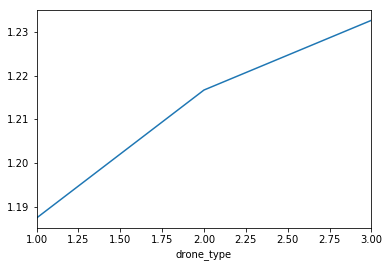

In [137]:
# there is the relationship between the speed and drone type
df.groupby('drone_type')['speed'].mean().plot(kind='line')
plt.show()

In [138]:
# drop unused columns
df.drop(df[['speed']], axis=1, inplace=True)
df.head(n=3)

id  drone_type  post_type  package_weight  origin_region  \
0  ID5174772222         2.0        1.0          43.632           47.0   
1  ID1302741470         2.0        0.0          14.230           42.0   
2  ID1271333154         1.0        0.0          31.700           19.0   

   destination_region  origin_latitude  origin_longitude  \
0                 3.0       -37.355446        145.140356   
1                45.0       -38.029425        146.072856   
2                 8.0       -38.467031        144.056414   

   destination_latitude  destination_longitude  journey_distance  \
0            -36.683571             147.271147           203.610   
1            -38.880642             145.089798           127.756   
2            -37.882256             147.344381           294.983   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
0     2018-03-24       03:47:54       163.99       6:31:53         187.16  
1     2018-04-01       19:00:04       105.65      20:45:43         132.04  
2     2018-04-27       01:05:05       240.38       5:05:27         122.90

## 13. Post Type (Coverage Anomalies)
>In this part, I find that the post type has the relationship with the id. Most of the ids starts with the number 1 have the post type 0.0; and if the id begins with the number 5, the post type of that id will be 1.0. Therefore, I'll fill those NaN values with the correct post type.

In [139]:
id_df = pd.DataFrame(df[['id', 'post_type']], columns=['id', 'post_type'])

# remove 'ID' to check the number of each id
id_df['id'] = id_df['id'].str.replace('ID', '')

# remove those NaN values in the id column
id_df = id_df.dropna(subset=['id'])

# convert the type of each value in the id column to int (to plot later) 
id_df['id'] = id_df['id'].astype(int)

#### start with 1 or 5
Based on the plot below, we can find the id is only start with 1 or 5.

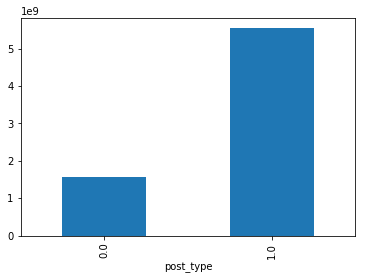

In [140]:
# find the regular relation for each post type
id_df.groupby('post_type')['id'].mean().plot(kind='bar')
plt.show()

In [141]:
# there are 20 NaN values in post_type
df.isnull().sum()

id                        0
drone_type                0
post_type                20
package_weight            0
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time               0
delivery_time             0
delivery_fare            30
dtype: int64

In [142]:
# create a new column storing only the first number of the id of each row
df['id_posttype'] = df['id'].str.replace('ID', '').astype(str).str[0]
df

id  drone_type  post_type  package_weight  origin_region  \
0      ID5174772222         2.0        1.0          43.632           47.0   
1      ID1302741470         2.0        0.0          14.230           42.0   
2      ID1271333154         1.0        0.0          31.700           19.0   
3      ID5399258418         2.0        1.0          11.500            7.0   
4      ID5288620287         1.0        1.0          14.545           28.0   
5      ID5993957587         2.0        1.0          33.332            9.0   
6      ID1175666777         3.0        0.0          14.360           34.0   
7      ID1247377835         1.0        0.0          16.681           21.0   
8      ID1727276208         1.0        0.0           7.631           21.0   
9      ID1656980587         1.0        0.0          41.862           33.0   
10     ID1229281063         3.0        0.0          36.585           40.0   
11     ID1430032672         3.0        0.0          44.666            7.0   
12     ID1422704796         1.0        0.0          33.833           39.0   
13     ID1814710120         3.0        0.0          22.782            5.0   
14     ID1144987939         2.0        0.0          23.153           10.0   
15     ID1639996043         1.0        0.0          39.888           48.0   
16     ID1589940287         2.0        0.0          42.803           12.0   
17     ID1700086850         1.0        0.0          40.017           12.0   
18     ID1816080840         3.0        0.0          41.875           14.0   
19     ID5188568054         1.0        1.0          42.657           46.0   
20     ID1693500629         1.0        0.0          30.022           46.0   
21     ID5483031848         2.0        1.0          41.371           20.0   
22     ID5902904752         3.0        1.0           6.951           31.0   
23     ID1133610304         1.0        0.0          35.364           33.0   
24     ID1388702296         1.0        0.0          19.875            4.0   
25     ID1936333571         1.0        0.0          42.657           48.0   
26     ID1369982920         1.0        0.0           6.635           30.0   
27     ID5871196450         3.0        1.0          32.778           41.0   
28     ID5876881006         3.0        1.0          18.442           30.0   
29     ID5229082212         1.0        1.0          12.185           19.0   
...             ...         ...        ...             ...            ...   
39023  ID1816357005         1.0        0.0          29.646           38.0   
39024  ID1824793455         1.0        0.0          27.746           44.0   
39025  ID1828097678         2.0        0.0          40.683           16.0   
39026  ID5333539279         2.0        1.0          44.121           26.0   
39027  ID1698358941         1.0        0.0          14.415           39.0   
39028  ID1947502850         2.0        0.0          12.414            2.0   
39029  ID1456857109         2.0        0.0           7.309           22.0   
39030  ID1893203974         1.0        0.0          22.552           45.0   
39031  ID1615605906         3.0        0.0          42.093           29.0   
39032  ID1973301217         2.0        0.0          39.527           37.0   
39033  ID1813877569         1.0        0.0          10.806           20.0   
39034  ID5624867288         1.0        1.0          41.682           32.0   
39035  ID1481721412         2.0        0.0          22.851           35.0   
39036  ID5830121158         1.0        1.0           7.868           45.0   
39037  ID5774209405         1.0        1.0          39.294           32.0   
39038  ID5414305342         1.0        1.0          40.341           13.0   
39039  ID1253359135         1.0        0.0          10.729           15.0   
39040  ID5266448836         1.0        1.0          16.572            7.0   
39041  ID1833326574         2.0        0.0          23.203           13.0   
39042  ID1308603357         1.0        0.0          31.830           17.0   
39043  ID5415

In [143]:
# find if the id is only start with 1 or 5
df.loc[(df['id_posttype'] != "1") & (df['id_posttype'] != "5")]

Empty DataFrame
Columns: [id, drone_type, post_type, package_weight, origin_region, destination_region, origin_latitude, origin_longitude, destination_latitude, destination_longitude, journey_distance, departure_date, departure_time, travel_time, delivery_time, delivery_fare, id_posttype]
Index: []

In [144]:
# ID start with 1, post_type is 0.0
df.loc[df['id_posttype'] == "1"]

id  drone_type  post_type  package_weight  origin_region  \
1      ID1302741470         2.0        0.0          14.230           42.0   
2      ID1271333154         1.0        0.0          31.700           19.0   
6      ID1175666777         3.0        0.0          14.360           34.0   
7      ID1247377835         1.0        0.0          16.681           21.0   
8      ID1727276208         1.0        0.0           7.631           21.0   
9      ID1656980587         1.0        0.0          41.862           33.0   
10     ID1229281063         3.0        0.0          36.585           40.0   
11     ID1430032672         3.0        0.0          44.666            7.0   
12     ID1422704796         1.0        0.0          33.833           39.0   
13     ID1814710120         3.0        0.0          22.782            5.0   
14     ID1144987939         2.0        0.0          23.153           10.0   
15     ID1639996043         1.0        0.0          39.888           48.0   
16     ID1589940287         2.0        0.0          42.803           12.0   
17     ID1700086850         1.0        0.0          40.017           12.0   
18     ID1816080840         3.0        0.0          41.875           14.0   
20     ID1693500629         1.0        0.0          30.022           46.0   
23     ID1133610304         1.0        0.0          35.364           33.0   
24     ID1388702296         1.0        0.0          19.875            4.0   
25     ID1936333571         1.0        0.0          42.657           48.0   
26     ID1369982920         1.0        0.0           6.635           30.0   
31     ID1635532517         2.0        0.0          18.382           25.0   
32     ID1767861094         1.0        0.0          41.873            5.0   
34     ID1446082806         1.0        0.0          23.177           49.0   
35     ID1833972715         1.0        0.0          11.343           20.0   
36     ID1996221519         2.0        0.0          36.368           18.0   
37     ID1977713717         2.0        0.0          12.802           31.0   
38     ID1509963327         3.0        0.0          19.101           13.0   
39     ID1605088713         1.0        0.0          33.077            1.0   
40     ID1496120933         1.0        0.0          30.166           49.0   
41     ID1390005894         1.0        0.0          10.233           22.0   
...             ...         ...        ...             ...            ...   
39011  ID1264328418         1.0        0.0          27.794            7.0   
39014  ID1216483233         1.0        0.0          19.751           19.0   
39016  ID1473475035         1.0        0.0          32.007           49.0   
39017  ID1396039881         1.0        0.0          42.703            4.0   
39018  ID1229353141         3.0        0.0          29.610           44.0   
39019  ID1179344084         1.0        0.0          29.392            7.0   
39020  ID1453291321         1.0        0.0          42.931           41.0   
39021  ID1562096205         1.0        0.0          27.265           48.0   
39023  ID1816357005         1.0        0.0          29.646           38.0   
39024  ID1824793455         1.0        0.0          27.746           44.0   
39025  ID1828097678         2.0        0.0          40.683           16.0   
39027  ID1698358941         1.0        0.0          14.415           39.0   
39028  ID1947502850         2.0        0.0          12.414            2.0   
39029  ID1456857109         2.0        0.0           7.309           22.0   
39030  ID1893203974         1.0        0.0          22.552           45.0   
39031  ID1615605906         3.0        0.0          42.093           29.0   
39032  ID1973301217         2.0        0.0          39.527           37.0   
39033  ID1813877569         1.0        0.0          10.806           20.0   
39035  ID1481721412         2.0        0.0          22.851           35.0   
39039  ID1253359135         1.0        0.0          10.729           15.0   
39041  ID1833

In [145]:
# find some invalid post_type (the id starts with 1 but the post type is not 0.0)
df.loc[(df['id_posttype'] == "1") & (df['post_type'] == 1.0)]

id  drone_type  post_type  package_weight  origin_region  \
580    ID1588757141         2.0        1.0          38.833           19.0   
2629   ID1220743195         1.0        1.0           5.585           28.0   
4643   ID1889816911         1.0        1.0          36.017           28.0   
4675   ID1241449759         2.0        1.0           5.668            8.0   
10783  ID1486302649         1.0        1.0          12.661           44.0   
14477  ID1823882912         1.0        1.0          35.145           35.0   
19003  ID1843153161         3.0        1.0          41.444           50.0   
21053  ID1543632820         1.0        1.0           5.143            3.0   
23074  ID1525979365         2.0        1.0          27.560           19.0   
23079  ID1688779220         3.0        1.0          25.576           45.0   
23114  ID1297155049         1.0        1.0          45.953            6.0   
23122  ID1425357921         2.0        1.0          37.997           14.0   
27224  ID1236830455         2.0        1.0          43.868           29.0   
29234  ID1973591871         2.0        1.0          18.037           38.0   
29241  ID1647262693         1.0        1.0          36.977           35.0   
31298  ID1659922464         1.0        1.0          35.983           30.0   
33845  ID1652242493         1.0        1.0           5.472           26.0   

       destination_region  origin_latitude  origin_longitude  \
580                  38.0       -38.332332        144.341779   
2629                 42.0       -37.250011        144.623973   
4643                 46.0       -37.171799        144.439902   
4675                  3.0       -37.951500        147.145961   
10783                37.0       -37.077193        147.235025   
14477                37.0       -36.536912        145.186334   
19003                22.0       -38.669541        142.894942   
21053                37.0       -36.602565        147.186000   
23074                24.0       -38.487975        144.232088   
23079                 9.0       -38.819472        145.224056   
23114                14.0       -37.482049        146.279866   
23122                38.0       -37.293970        146.659841   
27224                23.0       -37.322565        148.207777   
29234                39.0       -38.920578        147.571072   
29241                18.0       -36.540215        145.005699   
31298                22.0       -38.481437        143.219708   
33845                 4.0       -37.898379        148.365278   

       destination_latitude  destination_longitude  journey_distance  \
580              -38.985325             147.408682           276.307   
2629             -38.123026             145.927785           150.450   
4643             -37.367433             145.705172           114.180   
4675             -36.549470             147.170335           156.085   
10783            -36.821824             146.489303            72.174   
14477            -36.541273             146.582618           124.880   
19003            -38.413045             146.011606           272.845   
21053            -36.641966             146.460326            64.981   
23074            -38.996235             143.213207           105.008   
23079            -36.855130             144.367574           231.262   
23114            -37.314023             146.796814            49.394   
23122            -38.912248             147.427787           192.290   
27224            -38.850439             145.383791           300.218   
29234            -36.678196             145.793937           294.504   
29241            -38.817096             143.783938           275.357   
31298            -38.425101             146.043919           246.268   
33845            -37.847769             145.125066           284.761   

      departure_date departure_time  travel_time delivery_time  delivery_fare  \
580       2018-02-21       14:06:59       219.92      17:46:54         180.62   
2629      2018-02-

In [146]:
# ID start with 5, post_type is 1.0
df.loc[df['id_posttype'] == "5"]

id  drone_type  post_type  package_weight  origin_region  \
0      ID5174772222         2.0        1.0          43.632           47.0   
3      ID5399258418         2.0        1.0          11.500            7.0   
4      ID5288620287         1.0        1.0          14.545           28.0   
5      ID5993957587         2.0        1.0          33.332            9.0   
19     ID5188568054         1.0        1.0          42.657           46.0   
21     ID5483031848         2.0        1.0          41.371           20.0   
22     ID5902904752         3.0        1.0           6.951           31.0   
27     ID5871196450         3.0        1.0          32.778           41.0   
28     ID5876881006         3.0        1.0          18.442           30.0   
29     ID5229082212         1.0        1.0          12.185           19.0   
30     ID5393081411         1.0        1.0          12.469           46.0   
33     ID5659876813         2.0        1.0           5.502           32.0   
49     ID5249239396         1.0        1.0          17.658           40.0   
50     ID5710563009         3.0        1.0          41.831           12.0   
53     ID5826028319         3.0        1.0          19.473           38.0   
56     ID5227854953         1.0        1.0          21.091           34.0   
58     ID5375518670         1.0        1.0          15.117           16.0   
59     ID5447158077         2.0        1.0          43.009           49.0   
63     ID5787416733         3.0        1.0          17.290           43.0   
64     ID5523912403         1.0        1.0          35.441            9.0   
65     ID5701929700         2.0        1.0           7.042           25.0   
68     ID5690213972         2.0        1.0           5.521            7.0   
69     ID5360474039         3.0        1.0          32.853            3.0   
70     ID5432059182         2.0        1.0          21.677           38.0   
71     ID5885921527         2.0        1.0          14.378           50.0   
77     ID5615878318         1.0        1.0          22.149           14.0   
79     ID5439915314         2.0        1.0          39.305           12.0   
80     ID5385551261         1.0        1.0          24.369           37.0   
83     ID5888428175         2.0        1.0          33.176           34.0   
90     ID5898585477         2.0        1.0          45.427           49.0   
...             ...         ...        ...             ...            ...   
38949  ID5600987169         2.0        1.0          19.698           19.0   
38959  ID5940128892         2.0        1.0          17.891           44.0   
38963  ID5288800124         1.0        1.0          11.208           35.0   
38964  ID5844747697         1.0        1.0          44.056           47.0   
38965  ID5148978976         1.0        1.0           9.387           42.0   
38973  ID5196646792         1.0        1.0          32.017           12.0   
38974  ID5793851133         1.0        1.0          31.612           12.0   
38977  ID5914459147         1.0        1.0          17.037           29.0   
38978  ID5473056232         2.0        1.0          30.575           37.0   
38980  ID5981394904         2.0        1.0          36.242           15.0   
38982  ID5749642428         1.0        1.0          31.114           18.0   
38985  ID5960176950         2.0        1.0          17.657            4.0   
38988  ID5796363289         2.0        1.0           7.233           31.0   
38994  ID5967967067         1.0        1.0          15.732           50.0   
38998  ID5782277178         2.0        1.0           9.578           45.0   
39001  ID5219491290         2.0        1.0          37.532           27.0   
39002  ID5917423561         1.0        1.0          39.449           39.0   
39005  ID5329998706         1.0        1.0          43.357           39.0   
39012  ID5408588185         1.0        1.0          21.120           26.0   
39013  ID5286270012         1.0        1.0          39.798           22.0   
39015  ID5161

In [147]:
# find some invalid post_type (the id starts with 5 but the post type is not 1.0)
df.loc[(df['id_posttype'] == "5") & (df['post_type'] == 0.0)]

id  drone_type  post_type  package_weight  origin_region  \
2606   ID5572062533         1.0        0.0          13.322           38.0   
6720   ID5144453448         1.0        0.0          42.945           26.0   
6905   ID5560464805         2.0        0.0          43.937           42.0   
8734   ID5159413927         1.0        0.0          22.544           50.0   
8780   ID5212486404         2.0        0.0          14.991           49.0   
8793   ID5233261724         1.0        0.0          18.715           29.0   
13751  ID5930837862         2.0        0.0          23.316           23.0   
14901  ID5852893392         1.0        0.0          22.867           17.0   
16916  ID5391739160         2.0        0.0          38.468           10.0   
16921  ID5239050364         1.0        0.0          21.261           27.0   
19386  ID5604375373         1.0        0.0          36.157           38.0   
19552  ID5923852939         1.0        0.0          21.110           40.0   
21087  ID5757393515         2.0        0.0          41.847           49.0   
21254  ID5658906555         3.0        0.0          35.705            7.0   
21261  ID5651608806         2.0        0.0          14.844           42.0   
25117  ID5129378378         1.0        0.0          42.372            8.0   
26375  ID5813455478         3.0        0.0          28.668           50.0   
29225  ID5591873216         3.0        0.0           5.306           44.0   
29491  ID5828309536         2.0        0.0          13.587           36.0   
33550  ID5882908947         2.0        0.0          16.051           25.0   
37397  ID5606532646         1.0        0.0           8.230            1.0   
37412  ID5358229285         2.0        0.0          33.300           19.0   
37474  ID5980935605         3.0        0.0          40.133           47.0   

       destination_region  origin_latitude  origin_longitude  \
2606                 47.0       -39.002104        147.310953   
6720                 16.0       -37.929775        148.270267   
6905                 39.0       -38.017144        146.153842   
8734                 33.0       -38.899814        142.838237   
8780                 40.0       -38.241386        143.786223   
8793                 46.0       -37.264649        148.254770   
13751                32.0       -38.814310        145.369533   
14901                31.0       -37.110073        145.279927   
16916                40.0       -36.703839        147.710192   
16921                 1.0       -38.828239        146.504726   
19386                11.0       -38.959203        147.354319   
19552                30.0       -38.200994        147.882864   
21087                30.0       -38.289105        143.605920   
21254                32.0       -37.556005        147.845543   
21261                 6.0       -37.889681        145.836217   
25117                 5.0       -37.874849        147.345134   
26375                34.0       -38.728173        142.890746   
29225                39.0       -36.956343        147.215689   
29491                29.0       -37.670224        146.597489   
33550                32.0       -37.699801        145.738253   
37397                 9.0       -38.313840        145.202642   
37412                38.0       -38.233966        144.195486   
37474                 4.0       -37.341829        144.972596   

       destination_latitude  destination_longitude  journey_distance  \
2606             -37.506577             144.970472           263.748   
6720             -36.734782             142.997707           485.191   
6905             -36.678196             145.793937           152.412   
8734             -36.716937             143.740375           255.612   
8780             -38.173724             147.785358           349.859   
8793             -37.263769             145.878964           210.472   
13751            -37.363387             143.920347           205.436   
14901            -36.624065             148.097506     

In [148]:
# have a look before the emendation
df['post_type'].isnull().sum()

20

In [149]:
df.loc[(df['id_posttype'] == "1") & (df['post_type'].isnull()), ['post_type']] = 0.0
df.loc[(df['id_posttype'] == "5") & (df['post_type'].isnull()), ['post_type']] = 1.0

In [150]:
# remove unused columns
df.drop(df[['id_posttype']], axis=1, inplace=True)

#### Now there is no NaN value in post_type

In [151]:
df.isnull().sum()

id                        0
drone_type                0
post_type                 0
package_weight            0
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time               0
delivery_time             0
delivery_fare            30
dtype: int64

## 14. Package Weight

#### weight 50
The plots below can prove that the weight of 50 is a point to differentiate the other elements. For example, if the package weight is less than 50, the delivery price will be within a range below 225. While the travel time is directly proportional to the weight if the package weight is greater than 50. There is a plot below to show the relation between different elements and the weight. <br>
* Blue dots: the weight greater than 50
* Brown dots: the weight less than 50

In [152]:
# get data whose weight are less than 50
less50_df = df.loc[df['package_weight'] < 50]
less50_weight = less50_df['package_weight']
less50_fare = less50_df['delivery_fare']
less50_distance = less50_df['journey_distance']
less50_time = less50_df['travel_time']

# get data whose weight are greater than 50
greater50_df = df.loc[df['package_weight'] > 50]
greater50_weight = greater50_df['package_weight']
greater50_fare = greater50_df['delivery_fare']
greater50_distance = greater50_df['journey_distance']
greater50_time = greater50_df['travel_time']

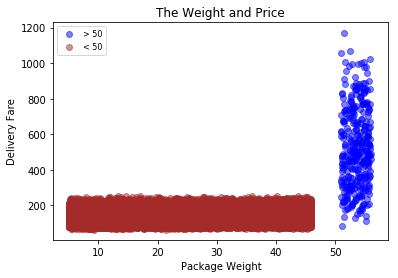

In [153]:
# weight v.s. fare
less_50_weight = plt.scatter(less50_weight, less50_fare, c='brown', alpha=0.5)
greater_50_weight = plt.scatter(greater50_weight, greater50_fare, c='blue', alpha=0.5)
plt.title("The Weight and Price")
plt.xlabel("Package Weight")
plt.ylabel("Delivery Fare")
plt.legend((greater_50_weight, less_50_weight),
           ('> 50', '< 50'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=8)
plt.show()

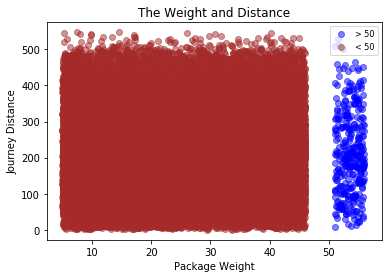

In [154]:
# weight v.s. journey distance
less_50_weight = plt.scatter(less50_weight, less50_distance, c='brown', alpha=0.5)
greater_50_weight = plt.scatter(greater50_weight, greater50_distance, c='blue', alpha=0.5)
plt.title("The Weight and Distance")
plt.xlabel("Package Weight")
plt.ylabel("Journey Distance")
plt.legend((greater_50_weight, less_50_weight),
           ('> 50', '< 50'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)
plt.show()

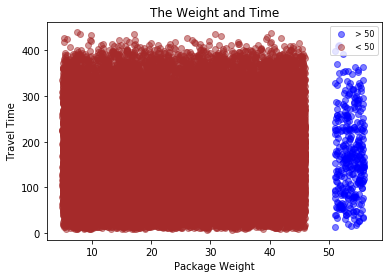

In [155]:
# weight v.s. travel time
less_50_weight = plt.scatter(less50_weight, less50_time, c='brown', alpha=0.5)
greater_50_weight = plt.scatter(greater50_weight, greater50_time, c='blue', alpha=0.5)
plt.title("The Weight and Time")
plt.xlabel("Package Weight")
plt.ylabel("Travel Time")
plt.legend((greater_50_weight, less_50_weight),
           ('> 50', '< 50'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)
plt.show()

## 15. Delivery Fare (Outliers)
>Based on the observation above and the plots below, I can see the delivery fare has the strong relationship with other features. We can see the correlation below.

In [156]:
df.corr()

drone_type  post_type  package_weight  origin_region  \
drone_type               1.000000   0.000215        0.001627       0.000352   
post_type                0.000215   1.000000       -0.004432       0.008088   
package_weight           0.001627  -0.004432        1.000000      -0.003871   
origin_region            0.000352   0.008088       -0.003871       1.000000   
destination_region       0.005635  -0.003306       -0.001125      -0.005687   
origin_latitude          0.006874  -0.000006        0.004279      -0.231223   
origin_longitude         0.002311  -0.005768        0.000558       0.014042   
destination_latitude    -0.004578  -0.002961        0.001337       0.002074   
destination_longitude   -0.002499  -0.002358        0.000573       0.000287   
journey_distance        -0.007921  -0.005593        0.005483       0.032732   
travel_time             -0.039698  -0.005730        0.005476       0.032783   
delivery_fare            0.514210   0.279727        0.159214       0.014751   

                       destination_region  origin_latitude  origin_longitude  \
drone_type                       0.005635         0.006874          0.002311   
post_type                       -0.003306        -0.000006         -0.005768   
package_weight                  -0.001125         0.004279          0.000558   
origin_region                   -0.005687        -0.231223          0.014042   
destination_region               1.000000        -0.001147          0.006763   
origin_latitude                 -0.001147         1.000000          0.045620   
origin_longitude                 0.006763         0.045620          1.000000   
destination_latitude            -0.243112         0.004833          0.001800   
destination_longitude            0.010687        -0.001496          0.002260   
journey_distance                 0.031762        -0.022678          0.010840   
travel_time                      0.031584        -0.022918          0.010730   
delivery_fare                    0.008373        -0.003574          0.005097   

                       destination_latitude  destination_longitude  \
drone_type                        -0.004578              -0.002499   
post_type                         -0.002961              -0.002358   
package_weight                     0.001337               0.000573   
origin_region                      0.002074               0.000287   
destination_region                -0.243112               0.010687   
origin_latitude                    0.004833              -0.001496   
origin_longitude                   0.001800               0.002260   
destination_latitude               1.000000               0.043550   
destination_longitude              0.043550               1.000000   
journey_distance                  -0.013325               0.006500   
travel_time                       -0.013240               0.006629   
delivery_fare                     -0.010346              -0.007643   

                       journey_distance  travel_time  delivery_fare  
drone_type                    -0.007921    -0.039698       0.514210  
post_type                     -0.005593    -0.005730       0.279727  
package_weight                 0.005483     0.005476       0.159214  
origin_region                  0.032732     0.032783       0.014751  
destination_region             0.031762     0.031584       0.008373  
origin_latitude               -0.022678    -0.022918      -0.003574  
origin_longitude               0.010840     0.010730       0.005097  
destination_latitude          -0.013325    -0.013240      -0.010346  
destination_longitude          0.006500     0.006629      -0.007643  
journey_distance               1.000000     0.999347       0.208519  
travel_time                    0.999347     1.000000       0.191878  
delivery_fare                  0.208519     0.191878       1.000000

### Find the relation between the fare and the drone type
The different drone tympe has the different speed and the speed is calculated by the journey distance and the travel time. We can find that the drone type has the relation with the delivery price as the outcome below. Moreover, I plot the graph to display there are the linear relation between the fare and distance & time. In other words, we can say the delivery fare has the strong relationship with the journey distance and the travel time.

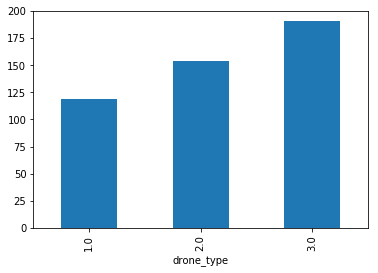

In [157]:
# there is the relationship between fare and drone type（speed）
df.groupby('drone_type')['delivery_fare'].mean().plot(kind='bar')
plt.show()

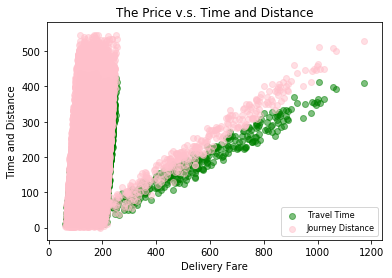

In [158]:
# fare v.s. time and distance
time = plt.scatter(df['delivery_fare'], df['travel_time'], c='g', alpha=0.5)
distance = plt.scatter(df['delivery_fare'], df['journey_distance'], c='pink', alpha=0.5)
plt.title("The Price v.s. Time and Distance")
plt.xlabel("Delivery Fare")
plt.ylabel("Time and Distance")
plt.legend((time, distance),
           ('Travel Time', 'Journey Distance'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=8)
plt.show()

### Find the relation between the fare and the post type
With the result below, we can find that the different post type has the different price. Therefore, there must be a relation between the post type and the delivery fare.

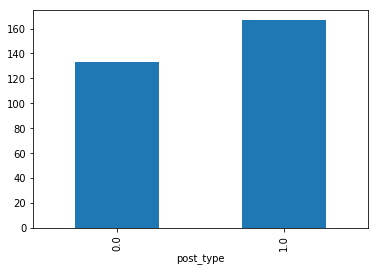

In [159]:
# there is the relationship between fare and post type
df.groupby('post_type')['delivery_fare'].mean().plot(kind='bar')
plt.show()

### Fill NaN with the linear regression

In [160]:
# extract only some columns having the relationship with the delivery fare
fare_df = pd.DataFrame(df[['drone_type', 'post_type', 'package_weight', 'journey_distance', 'travel_time', 'delivery_fare']], columns=['drone_type', 'post_type', 'package_weight', 'journey_distance', 'travel_time', 'delivery_fare'])

In [161]:
# check total of NaN values
fare_df.isnull().sum()

drone_type           0
post_type            0
package_weight       0
journey_distance     0
travel_time          0
delivery_fare       30
dtype: int64

In [162]:
len(fare_df)

39053

In [163]:
# create a data frame without NaN values
fare_nonan_df = fare_df.dropna()

In [164]:
# check total of NaN values again
fare_nonan_df.isnull().sum()

drone_type          0
post_type           0
package_weight      0
journey_distance    0
travel_time         0
delivery_fare       0
dtype: int64

In [165]:
len(fare_nonan_df)

39023

In [166]:
Q1 = fare_nonan_df['delivery_fare'].quantile(0.25)
Q3 = fare_nonan_df['delivery_fare'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR

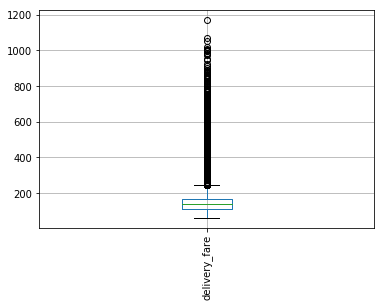

In [167]:
# nonan_df.boxplot(column=['delivery_fare'], by='drone_type', rot=90)
fare_nonan_df.boxplot(column=['delivery_fare'], rot=90)

In [168]:
# no NaN so far
fare_nonan_df['delivery_fare'].isnull().sum()

0

In [169]:
# replace those values which are outliers
fare_nonan_df['NaN'] = np.nan
condition = (fare_nonan_df['delivery_fare'] > upper_fence) | (fare_nonan_df['delivery_fare'] < lower_fence)    
fare_nonan_df['delivery_fare'] = np.where(condition, fare_nonan_df['NaN'], fare_nonan_df['delivery_fare'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [170]:
# can find there are 325 outliers (which replaced with NaN already)
fare_nonan_df['delivery_fare'].isnull().sum()

325

In [171]:
# drop unused column
fare_nonan_df.drop(fare_nonan_df[['NaN']], axis=1, inplace=True)

# drop those NaN
no_outlier_df = fare_nonan_df.dropna(subset=['delivery_fare'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [172]:
# rows decrease
len(no_outlier_df)

38698

In [173]:
no_outlier_df['delivery_fare'].isnull().sum()

0

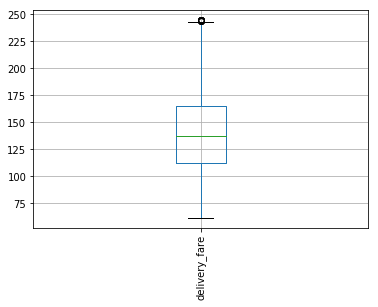

In [174]:
no_outlier_df.boxplot(column=['delivery_fare'], rot=90)

### Test (regression imputation)
I find that using the linear regression to predict is accurate. Moreover, I use the data without neither outliers nor NaN to build a model. Consequently, the training data will predict more accurate outcome.

In [175]:
# test_size=0.2 means 80% for training; 20% for testing
X_train, X_test, y_train, y_test = train_test_split(no_outlier_df, no_outlier_df[['delivery_fare']], test_size=0.2)

In [176]:
print("The shape of X_train is", X_train.shape)
print("The shape of X_test is", X_test.shape)

The shape of X_train is (30958, 6)
The shape of X_test is (7740, 6)


In [177]:
# instatiate (test)
test_model = LinearRegression() 
# fit (test)
test_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
# have a look (it's an array)
test_model.predict(X_test)

array([[129.49],
       [140.8 ],
       [142.22],
       ...,
       [100.58],
       [139.15],
       [142.58]])

In [179]:
# convert the array from ND to 1D and round values to 2 digits after the decimal point 
test_x = test_model.predict(X_test).flatten().round(2)

In [180]:
# round values to 2 digits after the decimal point in delivery_fare in y_test
y_test['delivery_fare'] = y_test['delivery_fare'].round(2)

In [181]:
# convert array to series and add into the y_test for comparison
y_test['predict_fare'] = pd.Series(test_x, index=y_test.index)

In [182]:
# the result below looks 100% accurate
y_test

delivery_fare  predict_fare
32936         129.49        129.49
31295         140.80        140.80
3602          142.22        142.22
23102          93.48         93.48
7093          119.17        119.17
35800         148.46        148.46
1606          138.71        138.71
16533         153.65        153.65
6369          131.46        131.46
13479         119.00        119.00
7193           81.09         81.09
15438         102.22        102.22
1587          200.01        200.01
24017         150.62        150.62
35050         128.86        128.86
27406          90.01         90.01
14721         188.43        188.43
13657         130.35        130.35
37464         120.67        120.67
32143         172.03        172.03
24582         138.03        138.03
7915          101.17        101.17
26432          72.96         72.96
6368          112.68        112.68
6551           92.87         92.87
32481         111.02        111.02
19833         131.38        131.38
15031         154.24        154.24
27837         171.70        171.70
29070          99.52         99.52
...              ...           ...
30048         128.78        128.78
4165          121.31        121.31
10112          90.87         90.87
37879         148.43        148.43
29261         122.77        122.77
18707          97.38         97.38
37498          94.97         94.97
4498          151.30        151.30
21933          91.91         91.91
5854          117.25        117.25
802           113.01        113.01
20631         117.02        117.02
21877         135.76        135.76
12973         120.12        120.12
10403         172.45        172.45
21196         193.99        193.99
35213         121.59        121.59
11775         157.36        157.36
14824         144.83        144.83
20992         151.39        151.39
12521         145.75        145.75
16015         134.05        134.05
11513         123.38        123.38
29706         206.60        206.60
14933          84.56         84.56
23898         100.47        100.47
3292          158.29        158.29
22371         100.58        100.58
24649         139.15        139.15
9644          142.58        142.58

[7740 rows x 2 columns]

In [183]:
# test if there is any different between the value in delivery_fare and predict_fare
y_test.loc[y_test['delivery_fare'] != y_test['predict_fare']]

Empty DataFrame
Columns: [delivery_fare, predict_fare]
Index: []

### Revise the delivery fare from here
As the outcome above, we can find the value in delivery_fare is same as the one in predict_fare. That is to say, it will be accurate to use the linear regression to predict. Thus, I'll replace NaN with the predicted value in the following.

In [184]:
# instatiate
model = LinearRegression()

In [185]:
# fit
model.fit(no_outlier_df[[x for x in no_outlier_df.columns if x != 'delivery_fare']], no_outlier_df[['delivery_fare']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
# convert the array from ND to 1D
predict_type = model.predict(fare_df.drop(['delivery_fare'],axis=1)).flatten()

In [187]:
fare_df['delivery_fare'][fare_df['delivery_fare'].isnull()] = predict_type

In [188]:
df['predict_fare'] = pd.Series(predict_type, index=df.index)

In [189]:
df.loc[:, ['delivery_fare', 'predict_fare']]

delivery_fare  predict_fare
0             187.16    174.879330
1             132.04    132.637625
2             122.90    112.305406
3             170.52    169.215523
4             139.68    123.984868
5             190.62    178.452827
6             155.92    172.960906
7             108.36    110.610657
8             119.50    109.160421
9              83.82    110.769142
10            201.81    190.545477
11            199.03    183.632990
12            121.98    110.519380
13            158.61    180.248641
14            156.55    163.201891
15             96.35    119.511493
16            140.64    143.961365
17             75.18     96.059467
18            192.77    180.687769
19            121.17    127.980429
20             97.98    103.821313
21            170.95    173.528310
22            224.27    221.220158
23            113.32    100.926515
24             98.44    103.184537
25             84.13    101.081330
26            115.12    104.763160
27            212.53    229.612183
28            204.13    208.304036
29            126.27    126.406273
...              ...           ...
39023         114.40    120.295960
39024         128.74    112.850585
39025         151.41    169.426709
39026         208.70    193.306152
39027          78.12     86.509855
39028         151.87    139.724685
39029         148.48    132.320290
39030          86.50    103.369915
39031         153.52    172.697033
39032         154.31    140.107851
39033          93.77     97.417410
39034         138.31    131.383183
39035         122.79    141.827780
39036         129.75    128.624332
39037         131.57    130.978343
39038         145.56    128.187467
39039          95.02     98.900250
39040         157.40    141.605311
39041         141.70    127.303287
39042         110.56     94.454622
39043         144.63    129.086126
39044         160.04    148.155991
39045          85.51    106.301898
39046         171.66    176.786058
39047          84.79     88.242388
39048         102.43    105.420571
39049         183.13    166.885269
39050         144.83    132.843605
39051         119.05    108.632390
39052         101.13    102.958314

[39053 rows x 2 columns]

In [190]:
fare_df.isnull().sum()

drone_type          0
post_type           0
package_weight      0
journey_distance    0
travel_time         0
delivery_fare       0
dtype: int64

In [191]:
# check the lenght, it still keeps the same
len(fare_df)

39053

In [192]:
# all NaN values have been revised already
fare_df[fare_df['delivery_fare'].isnull()]

Empty DataFrame
Columns: [drone_type, post_type, package_weight, journey_distance, travel_time, delivery_fare]
Index: []

In [193]:
# drop unused columns
fare_df.drop(fare_df[['drone_type', 'post_type', 'package_weight', 'journey_distance', 'travel_time']], axis=1, inplace=True)
fare_df

delivery_fare
0             187.16
1             132.04
2             122.90
3             170.52
4             139.68
5             190.62
6             155.92
7             108.36
8             119.50
9              83.82
10            201.81
11            199.03
12            121.98
13            158.61
14            156.55
15             96.35
16            140.64
17             75.18
18            192.77
19            121.17
20             97.98
21            170.95
22            224.27
23            113.32
24             98.44
25             84.13
26            115.12
27            212.53
28            204.13
29            126.27
...              ...
39023         114.40
39024         128.74
39025         151.41
39026         208.70
39027          78.12
39028         151.87
39029         148.48
39030          86.50
39031         153.52
39032         154.31
39033          93.77
39034         138.31
39035         122.79
39036         129.75
39037         131.57
39038         145.56
39039          95.02
39040         157.40
39041         141.70
39042         110.56
39043         144.63
39044         160.04
39045          85.51
39046         171.66
39047          84.79
39048         102.43
39049         183.13
39050         144.83
39051         119.05
39052         101.13

[39053 rows x 1 columns]

In [194]:
# there are still 30 NaN in delivery_fare
df.isnull().sum()

id                        0
drone_type                0
post_type                 0
package_weight            0
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time               0
delivery_time             0
delivery_fare            30
predict_fare              0
dtype: int64

In [195]:
df.drop(df[['predict_fare']], axis=1, inplace=True)
df.head(n=2)

id  drone_type  post_type  package_weight  origin_region  \
0  ID5174772222         2.0        1.0          43.632           47.0   
1  ID1302741470         2.0        0.0          14.230           42.0   

   destination_region  origin_latitude  origin_longitude  \
0                 3.0       -37.355446        145.140356   
1                45.0       -38.029425        146.072856   

   destination_latitude  destination_longitude  journey_distance  \
0            -36.683571             147.271147           203.610   
1            -38.880642             145.089798           127.756   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
0     2018-03-24       03:47:54       163.99       6:31:53         187.16  
1     2018-04-01       19:00:04       105.65      20:45:43         132.04

#### update df with fare_df
The different value in df will be updated by the value in fare_df.

In [196]:
# update()
df.update(fare_df)

#### now there is no NaN value in fare_type

In [197]:
# have a look
df.isnull().sum()

id                       0
drone_type               0
post_type                0
package_weight           0
origin_region            0
destination_region       0
origin_latitude          0
origin_longitude         0
destination_latitude     0
destination_longitude    0
journey_distance         0
departure_date           0
departure_time           0
travel_time              0
delivery_time            0
delivery_fare            0
dtype: int64

In [198]:
# change column names back to the original ones
df.columns = df.columns.str.title().str.replace('_', ' ')

In [199]:
# check
df

Id  Drone Type  Post Type  Package Weight  Origin Region  \
0      ID5174772222         2.0        1.0          43.632           47.0   
1      ID1302741470         2.0        0.0          14.230           42.0   
2      ID1271333154         1.0        0.0          31.700           19.0   
3      ID5399258418         2.0        1.0          11.500            7.0   
4      ID5288620287         1.0        1.0          14.545           28.0   
5      ID5993957587         2.0        1.0          33.332            9.0   
6      ID1175666777         3.0        0.0          14.360           34.0   
7      ID1247377835         1.0        0.0          16.681           21.0   
8      ID1727276208         1.0        0.0           7.631           21.0   
9      ID1656980587         1.0        0.0          41.862           33.0   
10     ID1229281063         3.0        0.0          36.585           40.0   
11     ID1430032672         3.0        0.0          44.666            7.0   
12     ID1422704796         1.0        0.0          33.833           39.0   
13     ID1814710120         3.0        0.0          22.782            5.0   
14     ID1144987939         2.0        0.0          23.153           10.0   
15     ID1639996043         1.0        0.0          39.888           48.0   
16     ID1589940287         2.0        0.0          42.803           12.0   
17     ID1700086850         1.0        0.0          40.017           12.0   
18     ID1816080840         3.0        0.0          41.875           14.0   
19     ID5188568054         1.0        1.0          42.657           46.0   
20     ID1693500629         1.0        0.0          30.022           46.0   
21     ID5483031848         2.0        1.0          41.371           20.0   
22     ID5902904752         3.0        1.0           6.951           31.0   
23     ID1133610304         1.0        0.0          35.364           33.0   
24     ID1388702296         1.0        0.0          19.875            4.0   
25     ID1936333571         1.0        0.0          42.657           48.0   
26     ID1369982920         1.0        0.0           6.635           30.0   
27     ID5871196450         3.0        1.0          32.778           41.0   
28     ID5876881006         3.0        1.0          18.442           30.0   
29     ID5229082212         1.0        1.0          12.185           19.0   
...             ...         ...        ...             ...            ...   
39023  ID1816357005         1.0        0.0          29.646           38.0   
39024  ID1824793455         1.0        0.0          27.746           44.0   
39025  ID1828097678         2.0        0.0          40.683           16.0   
39026  ID5333539279         2.0        1.0          44.121           26.0   
39027  ID1698358941         1.0        0.0          14.415           39.0   
39028  ID1947502850         2.0        0.0          12.414            2.0   
39029  ID1456857109         2.0        0.0           7.309           22.0   
39030  ID1893203974         1.0        0.0          22.552           45.0   
39031  ID1615605906         3.0        0.0          42.093           29.0   
39032  ID1973301217         2.0        0.0          39.527           37.0   
39033  ID1813877569         1.0        0.0          10.806           20.0   
39034  ID5624867288         1.0        1.0          41.682           32.0   
39035  ID1481721412         2.0        0.0          22.851           35.0   
39036  ID5830121158         1.0        1.0           7.868           45.0   
39037  ID5774209405         1.0        1.0          39.294           32.0   
39038  ID5414305342         1.0        1.0          40.341           13.0   
39039  ID1253359135         1.0        0.0          10.729           15.0   
39040  ID5266448836         1.0        1.0          16.572            7.0   
39041  ID1833326574         2.0        0.0          23.203           13.0   
39042  ID1308603357         1.0        0.0          31.830           17.0   
39043  ID5415

In [201]:
df.to_csv("clean_29286875.csv", encoding='utf-8')